# Data Mining HW2

In [1]:
# importing used libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set()

In [2]:
# After quick manipulations we fixed the encoding problems for files teams.json and players.json 
# (they had extra \ which prevented the utf-8 encoding from being detected)

In [3]:
df_coaches = pd.read_json('coaches.json',encoding='utf-8')
df_coaches

,wyId,shortName,firstName,middleName,lastName,birthDate,birthArea,passportArea,currentTeamId
0,275580,Cesar Domingo,César Domingo,,Mendiondo López,None,"{'id': 76, 'alpha2code': 'BR', 'alpha3code': '...","{'id': 76, 'alpha2code': 'BR', 'alpha3code': '...",0
1,14710,J. Heynckes,Josef,,Heynckes,1945-05-09,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...","{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...",0
2,135480,G. De Biasi,Giovanni,,De Biasi,1956-06-16,"{'id': 380, 'alpha2code': 'IT', 'alpha3code': ...","{'id': 380, 'alpha2code': 'IT', 'alpha3code': ...",0
3,210074,Marcelino,Marcelino,,García Toral,1965-08-14,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...","{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",674
4,293398,T. Korkut,Tayfun,,Korkut,1974-04-02,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...","{'id': 792, 'alpha2code': 'TR', 'alpha3code': ...",0
...,...,...,...,...,...,...,...,...,...
203,264939,José Miguel Campos,José Miguel,,Campos Rodríguez,1966-08-12,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...","{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",0
204,26213,M. Der Zakarian,Michel,,Der Zakarian,1963-02-18,"{'id': 51, 'alpha2code': 'AM', 'alpha3code': '...","{'id': 51, 'alpha2code': 'AM', 'alpha3code': '...",3787
205,7845,A. Wenger,Arsène,,Wenger,1949-10-22,"{'id': 250, 'alpha2code': 'FR', 'alpha3code': ...","{'id': 250, 'alpha2code': 'FR', 'alpha3code': ...",0
206,3485,Mendilibar,José Luis,,Mendilibar Etxebarria,1961-03-14,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...","{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",701


In [4]:
df_players = pd.read_json('players_new.json',encoding='utf-8')
df_players

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,,Mandanda,3772,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,,O. Mandanda,null
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,,Konaté,2975,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konaté,null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3598,"{'name': 'Tunisia', 'id': 788, 'alpha3code': '...",72,Ali,,Maâloul,16041,1990-01-01,175,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Tunisia', 'id': 788, 'alpha3code': '...",120839,left,A. Maâloul,null
3599,"{'name': 'Peru', 'id': 604, 'alpha3code': 'PER...",76,Carlos Alberto,,Cáceda Oyaguez,15591,1991-09-27,183,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Peru', 'id': 604, 'alpha3code': 'PER...",114736,right,C. Cáceda,null
3600,"{'name': 'Peru', 'id': 604, 'alpha3code': 'PER...",78,Miguel Gianpierre,,Araujo Blanco,12072,1994-10-24,179,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Peru', 'id': 604, 'alpha3code': 'PER...",114908,right,M. Araujo,null
3601,"{'name': 'Morocco', 'id': 504, 'alpha3code': '...",70,Ahmed Reda,,Tagnaouti,16183,1996-04-05,182,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Morocco', 'id': 504, 'alpha3code': '...",285583,right,A. Tagnaouti,null


In [5]:
df_teams = pd.read_json('teams_new.json',encoding='utf-8')
df_teams

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,Vitoria-Gasteiz,Deportivo Alavés,696,Deportivo Alavés,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
...,...,...,...,...,...,...
137,Las Rozas,Spain,1598,Spain,"{'name': 'Spain', 'id': 724, 'alpha3code': 'ES...",national
138,Beograd,Serbia,17322,Serbia,"{'name': 'Serbia', 'id': 688, 'alpha3code': 'S...",national
139,Bern,Switzerland,6697,Switzerland,"{'name': 'Switzerland', 'id': 756, 'alpha3code...",national
140,Warszawa,Poland,13869,Poland,"{'name': 'Poland', 'id': 616, 'alpha3code': 'P...",national


In [6]:
df_events_PL = pd.read_json('events_England.json',encoding='utf-8')
df_events_PL

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175
...,...,...,...,...,...,...,...,...,...,...,...,...
643145,5,Ball out of the field,[],0,"[{'y': 32, 'x': 0}, {'y': 100, 'x': 100}]",2500098,Interruption,1623,2H,2796.732525,50,251596409
643146,3,Corner,"[{'id': 302}, {'id': 801}, {'id': 1801}]",70965,"[{'y': 100, 'x': 100}, {'y': 47, 'x': 88}]",2500098,Free Kick,1633,2H,2829.821084,30,251596232
643147,1,Air duel,"[{'id': 701}, {'id': 1802}]",7919,"[{'y': 53, 'x': 12}, {'y': 50, 'x': 14}]",2500098,Duel,1623,2H,2831.211419,10,251596410
643148,1,Air duel,"[{'id': 703}, {'id': 1801}]",8005,"[{'y': 47, 'x': 88}, {'y': 50, 'x': 86}]",2500098,Duel,1633,2H,2832.434399,10,251596234


In [7]:
df_matches_PL = pd.read_json('matches_England.json',encoding='utf-8')
df_matches_PL

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4405654,38,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",181150,2018-05-13 14:00:00,1659,Turf Moor,2500089,"Burnley - AFC Bournemouth, 1 - 2","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",Regular,364
1,Played,4405654,38,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",181150,2018-05-13 14:00:00,1628,Selhurst Park,2500090,"Crystal Palace - West Bromwich Albion, 2 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381851, 'role': 'referee'}, {'r...",Regular,364
2,Played,4405654,38,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2018-05-13 14:00:00,1609,The John Smith's Stadium,2500091,"Huddersfield Town - Arsenal, 0 - 1","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 384965, 'role': 'referee'}, {'r...",Regular,364
3,Played,4405654,38,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",181150,2018-05-13 14:00:00,1612,Anfield,2500092,"Liverpool - Brighton & Hove Albion, 4 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385704, 'role': 'referee'}, {'r...",Regular,364
4,Played,4405654,38,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",181150,2018-05-13 14:00:00,1611,Old Trafford,2500093,"Manchester United - Watford, 1 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381853, 'role': 'referee'}, {'r...",Regular,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Played,4405654,1,"{'1623': {'scoreET': 0, 'coachId': 268779, 'si...",181150,2017-08-12 14:00:00,1623,Goodison Park,2499723,"Everton - Stoke City, 1 - 0","August 12, 2017 at 4:00:00 PM GMT+2","[{'refereeId': 385915, 'role': 'referee'}, {'r...",Regular,364
376,Played,4405654,1,"{'10531': {'scoreET': 0, 'coachId': 381291, 's...",181150,2017-08-12 14:00:00,0,St. Mary's Stadium,2499726,"Southampton - Swansea City, 0 - 0","August 12, 2017 at 4:00:00 PM GMT+2","[{'refereeId': 385916, 'role': 'referee'}, {'r...",Regular,364
377,Played,4405654,1,"{'1659': {'scoreET': 0, 'coachId': 8934, 'side...",181150,2017-08-12 14:00:00,1627,The Hawthorns,2499728,"West Bromwich Albion - AFC Bournemouth, 1 - 0","August 12, 2017 at 4:00:00 PM GMT+2","[{'refereeId': 379443, 'role': 'referee'}, {'r...",Regular,364
378,Played,4405654,1,"{'1644': {'scoreET': 0, 'coachId': 71037, 'sid...",181150,2017-08-12 11:30:00,0,Vicarage Road Stadium,2499727,"Watford - Liverpool, 3 - 3","August 12, 2017 at 1:30:00 PM GMT+2","[{'refereeId': 378952, 'role': 'referee'}, {'r...",Regular,364


In [8]:
# Let's work with the df_matches_PL dataset

In [9]:
# here we split the column 'label' and create 4 lists containing the splitted information (home team, awayteam,
# home score and away score), for each game of the season

home_teams = []
away_teams = []
home_scores = []
away_scores = []


for index,row in df_matches_PL.iterrows():
    print(row['label'].replace(',','-').split('-'))
    home_teams.append(row['label'].replace(',','-').split('-')[0].strip())
    away_teams.append(row['label'].replace(',','-').split('-')[1].strip())
    home_scores.append(row['label'].replace(',','-').split('-')[2].strip())
    away_scores.append(row['label'].replace(',','-').split('-')[3].strip())
    

['Burnley ', ' AFC Bournemouth', ' 1 ', ' 2']
['Crystal Palace ', ' West Bromwich Albion', ' 2 ', ' 0']
['Huddersfield Town ', ' Arsenal', ' 0 ', ' 1']
['Liverpool ', ' Brighton & Hove Albion', ' 4 ', ' 0']
['Manchester United ', ' Watford', ' 1 ', ' 0']
['Newcastle United ', ' Chelsea', ' 3 ', ' 0']
['Southampton ', ' Manchester City', ' 0 ', ' 1']
['Swansea City ', ' Stoke City', ' 1 ', ' 2']
['Tottenham Hotspur ', ' Leicester City', ' 5 ', ' 4']
['West Ham United ', ' Everton', ' 3 ', ' 1']
['West Ham United ', ' Manchester United', ' 0 ', ' 0']
['Manchester City ', ' Brighton & Hove Albion', ' 3 ', ' 1']
['Tottenham Hotspur ', ' Newcastle United', ' 1 ', ' 0']
['Leicester City ', ' Arsenal', ' 3 ', ' 1']
['Chelsea ', ' Huddersfield Town', ' 1 ', ' 1']
['Swansea City ', ' Southampton', ' 0 ', ' 1']
['Arsenal ', ' Burnley', ' 5 ', ' 0']
['Chelsea ', ' Liverpool', ' 1 ', ' 0']
['Manchester City ', ' Huddersfield Town', ' 0 ', ' 0']
['Everton ', ' Southampton', ' 1 ', ' 1']
['AFC Bourn

In [10]:
# we create new columns in the df, containing the lists we just created

df_matches_PL['home_team'] = home_teams
df_matches_PL['away_team'] = away_teams
df_matches_PL['home_score'] = home_scores
df_matches_PL['away_score'] = away_scores

In [11]:
df_matches_PL

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId,home_team,away_team,home_score,away_score
0,Played,4405654,38,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",181150,2018-05-13 14:00:00,1659,Turf Moor,2500089,"Burnley - AFC Bournemouth, 1 - 2","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",Regular,364,Burnley,AFC Bournemouth,1,2
1,Played,4405654,38,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",181150,2018-05-13 14:00:00,1628,Selhurst Park,2500090,"Crystal Palace - West Bromwich Albion, 2 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381851, 'role': 'referee'}, {'r...",Regular,364,Crystal Palace,West Bromwich Albion,2,0
2,Played,4405654,38,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2018-05-13 14:00:00,1609,The John Smith's Stadium,2500091,"Huddersfield Town - Arsenal, 0 - 1","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 384965, 'role': 'referee'}, {'r...",Regular,364,Huddersfield Town,Arsenal,0,1
3,Played,4405654,38,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",181150,2018-05-13 14:00:00,1612,Anfield,2500092,"Liverpool - Brighton & Hove Albion, 4 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385704, 'role': 'referee'}, {'r...",Regular,364,Liverpool,Brighton & Hove Albion,4,0
4,Played,4405654,38,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",181150,2018-05-13 14:00:00,1611,Old Trafford,2500093,"Manchester United - Watford, 1 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381853, 'role': 'referee'}, {'r...",Regular,364,Manchester United,Watford,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Played,4405654,1,"{'1623': {'scoreET': 0, 'coachId': 268779, 'si...",181150,2017-08-12 14:00:00,1623,Goodison Park,2499723,"Everton - Stoke City, 1 - 0","August 12, 2017 at 4:00:00 PM GMT+2","[{'refereeId': 385915, 'role': 'referee'}, {'r...",Regular,364,Everton,Stoke City,1,0
376,Played,4405654,1,"{'10531': {'scoreET': 0, 'coachId': 381291, 's...",181150,2017-08-12 14:00:00,0,St. Mary's Stadium,2499726,"Southampton - Swansea City, 0 - 0","August 12, 2017 at 4:00:00 PM GMT+2","[{'refereeId': 385916, 'role': 'referee'}, {'r...",Regular,364,Southampton,Swansea City,0,0
377,Played,4405654,1,"{'1659': {'scoreET': 0, 'coachId': 8934, 'side...",181150,2017-08-12 14:00:00,1627,The Hawthorns,2499728,"West Bromwich Albion - AFC Bournemouth, 1 - 0","August 12, 2017 at 4:00:00 PM GMT+2","[{'refereeId': 379443, 'role': 'referee'}, {'r...",Regular,364,West Bromwich Albion,AFC Bournemouth,1,0
378,Played,4405654,1,"{'1644': {'scoreET': 0, 'coachId': 71037, 'sid...",181150,2017-08-12 11:30:00,0,Vicarage Road Stadium,2499727,"Watford - Liverpool, 3 - 3","August 12, 2017 at 1:30:00 PM GMT+2","[{'refereeId': 378952, 'role': 'referee'}, {'r...",Regular,364,Watford,Liverpool,3,3


In [12]:
# we determine the winner and loser (or draw) for each game by comparing the home and away scores

winners = []
losers = []

for index,row in df_matches_PL.iterrows():
    if row['home_score'] > row['away_score']:
        winners.append(row['home_team'])
        losers.append(row['away_team'])
    elif row['home_score'] < row['away_score']:
        winners.append(row['away_team'])
        losers.append(row['home_team'])
    elif row['home_score'] == row['away_score']:
        winners.append('Draw')
        losers.append('Draw')

In [13]:
df_matches_PL['winner'] = winners
df_matches_PL['loser'] = losers

In [14]:
df_matches_PL

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId,home_team,away_team,home_score,away_score,loser
0,Played,4405654,38,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",181150,2018-05-13 14:00:00,AFC Bournemouth,Turf Moor,2500089,"Burnley - AFC Bournemouth, 1 - 2","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",Regular,364,Burnley,AFC Bournemouth,1,2,Burnley
1,Played,4405654,38,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",181150,2018-05-13 14:00:00,Crystal Palace,Selhurst Park,2500090,"Crystal Palace - West Bromwich Albion, 2 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381851, 'role': 'referee'}, {'r...",Regular,364,Crystal Palace,West Bromwich Albion,2,0,West Bromwich Albion
2,Played,4405654,38,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2018-05-13 14:00:00,Arsenal,The John Smith's Stadium,2500091,"Huddersfield Town - Arsenal, 0 - 1","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 384965, 'role': 'referee'}, {'r...",Regular,364,Huddersfield Town,Arsenal,0,1,Huddersfield Town
3,Played,4405654,38,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",181150,2018-05-13 14:00:00,Liverpool,Anfield,2500092,"Liverpool - Brighton & Hove Albion, 4 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385704, 'role': 'referee'}, {'r...",Regular,364,Liverpool,Brighton & Hove Albion,4,0,Brighton & Hove Albion
4,Played,4405654,38,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",181150,2018-05-13 14:00:00,Manchester United,Old Trafford,2500093,"Manchester United - Watford, 1 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381853, 'role': 'referee'}, {'r...",Regular,364,Manchester United,Watford,1,0,Watford
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Played,4405654,1,"{'1623': {'scoreET': 0, 'coachId': 268779, 'si...",181150,2017-08-12 14:00:00,Everton,Goodison Park,2499723,"Everton - Stoke City, 1 - 0","August 12, 2017 at 4:00:00 PM GMT+2","[{'refereeId': 385915, 'role': 'referee'}, {'r...",Regular,364,Everton,Stoke City,1,0,Stoke City
376,Played,4405654,1,"{'10531': {'scoreET': 0, 'coachId': 381291, 's...",181150,2017-08-12 14:00:00,Draw,St. Mary's Stadium,2499726,"Southampton - Swansea City, 0 - 0","August 12, 2017 at 4:00:00 PM GMT+2","[{'refereeId': 385916, 'role': 'referee'}, {'r...",Regular,364,Southampton,Swansea City,0,0,Draw
377,Played,4405654,1,"{'1659': {'scoreET': 0, 'coachId': 8934, 'side...",181150,2017-08-12 14:00:00,West Bromwich Albion,The Hawthorns,2499728,"West Bromwich Albion - AFC Bournemouth, 1 - 0","August 12, 2017 at 4:00:00 PM GMT+2","[{'refereeId': 379443, 'role': 'referee'}, {'r...",Regular,364,West Bromwich Albion,AFC Bournemouth,1,0,AFC Bournemouth
378,Played,4405654,1,"{'1644': {'scoreET': 0, 'coachId': 71037, 'sid...",181150,2017-08-12 11:30:00,Draw,Vicarage Road Stadium,2499727,"Watford - Liverpool, 3 - 3","August 12, 2017 at 1:30:00 PM GMT+2","[{'refereeId': 378952, 'role': 'referee'}, {'r...",Regular,364,Watford,Liverpool,3,3,Draw


## RQ1) Who wants to be a Champion?

In [15]:
#Now that we have all the data we need, let's select what we will use for question 1

df_1 = df_matches_PL[['gameweek','home_team','away_team','home_score','away_score','winner','loser','label']]
df_1

,gameweek,home_team,away_team,home_score,away_score,winner,loser,label
0,38,Burnley,AFC Bournemouth,1,2,AFC Bournemouth,Burnley,"Burnley - AFC Bournemouth, 1 - 2"
1,38,Crystal Palace,West Bromwich Albion,2,0,Crystal Palace,West Bromwich Albion,"Crystal Palace - West Bromwich Albion, 2 - 0"
2,38,Huddersfield Town,Arsenal,0,1,Arsenal,Huddersfield Town,"Huddersfield Town - Arsenal, 0 - 1"
3,38,Liverpool,Brighton & Hove Albion,4,0,Liverpool,Brighton & Hove Albion,"Liverpool - Brighton & Hove Albion, 4 - 0"
4,38,Manchester United,Watford,1,0,Manchester United,Watford,"Manchester United - Watford, 1 - 0"
...,...,...,...,...,...,...,...,...
375,1,Everton,Stoke City,1,0,Everton,Stoke City,"Everton - Stoke City, 1 - 0"
376,1,Southampton,Swansea City,0,0,Draw,Draw,"Southampton - Swansea City, 0 - 0"
377,1,West Bromwich Albion,AFC Bournemouth,1,0,West Bromwich Albion,AFC Bournemouth,"West Bromwich Albion - AFC Bournemouth, 1 - 0"
378,1,Watford,Liverpool,3,3,Draw,Draw,"Watford - Liverpool, 3 - 3"


In [16]:
df_teams

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,Vitoria-Gasteiz,Deportivo Alavés,696,Deportivo Alavés,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
...,...,...,...,...,...,...
137,Las Rozas,Spain,1598,Spain,"{'name': 'Spain', 'id': 724, 'alpha3code': 'ES...",national
138,Beograd,Serbia,17322,Serbia,"{'name': 'Serbia', 'id': 688, 'alpha3code': 'S...",national
139,Bern,Switzerland,6697,Switzerland,"{'name': 'Switzerland', 'id': 756, 'alpha3code...",national
140,Warszawa,Poland,13869,Poland,"{'name': 'Poland', 'id': 616, 'alpha3code': 'P...",national


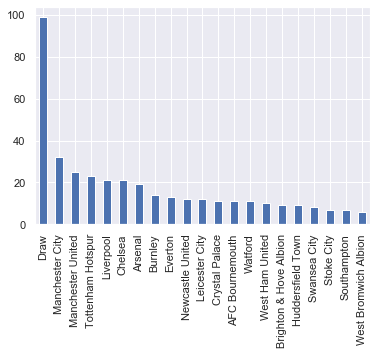

In [17]:
#just some visualization

df_1['winner'].value_counts().plot(kind='bar')
plt.show()

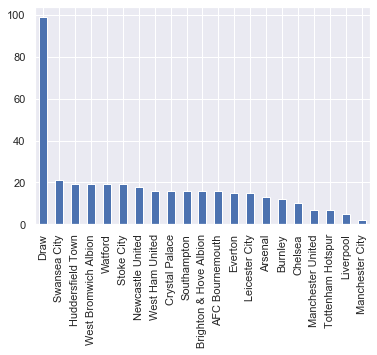

In [18]:
#just some visualization

df_1['loser'].value_counts().plot(kind='bar')
plt.show()

In [19]:
PL_teams = df_1['home_team'].tolist()
PL_teams = sorted(list(dict.fromkeys(PL_teams))) #deduplicate and sort

In [20]:
PL_teams

['AFC Bournemouth',
 'Arsenal',
 'Brighton & Hove Albion',
 'Burnley',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Huddersfield Town',
 'Leicester City',
 'Liverpool',
 'Manchester City',
 'Manchester United',
 'Newcastle United',
 'Southampton',
 'Stoke City',
 'Swansea City',
 'Tottenham Hotspur',
 'Watford',
 'West Bromwich Albion',
 'West Ham United']

In [21]:
# We create a list containing each team with its number of points at the end of the season

import pylab
from numpy import cumsum
from collections import OrderedDict

lst = []

for team in PL_teams:
    points = [0]
    dftest = df_1.loc[(df_1['home_team'] == team) | (df_1['away_team'] == team)].sort_values(by='gameweek')
    for index,row in dftest.iterrows():
        if (row['winner'] == team):
            points.append(3)
        elif (row['loser'] == team):  
            points.append(0)      
        else:
            points.append(1)
            
    
    lst.append((team,sum(points)))

# Then we sort the teams according to their points (from highest to lowest), 
# and extract the team names to have the table ranking of the league

sorted_by_second = sorted(lst, key=lambda tup: tup[1])
ordered_table = [i[0] for i in sorted_by_second]
ordered_table.reverse()

In [22]:
ordered_table

['Manchester City',
 'Manchester United',
 'Tottenham Hotspur',
 'Liverpool',
 'Chelsea',
 'Arsenal',
 'Burnley',
 'Everton',
 'Leicester City',
 'Newcastle United',
 'Crystal Palace',
 'AFC Bournemouth',
 'West Ham United',
 'Watford',
 'Brighton & Hove Albion',
 'Huddersfield Town',
 'Southampton',
 'Swansea City',
 'Stoke City',
 'West Bromwich Albion']

In [23]:
# we create two functions that will help us determine the longest streaks

def longest_winning_streak(points):

    longest = 0
    current = 0
    for num in points:
        if num == 3:
            current += 1
        else:
            longest = max(longest, current)
            current = 0

    return max(longest, current)


def longest_losing_streak(points):

    longest = 0
    current = 0
    for num in points:
        if num == 0:
            current += 1
        else:
            longest = max(longest, current)
            current = 0

    return max(longest, current)

In [24]:
# and then for each team, we append to an empty list the team name, 
# its longest winning streak, and its longest losing streak

# therefore, for each team, we append to a list the result (in points won) of each game

streaks = []

for team in ordered_table:
    points = []
    dftest = df_1.loc[(df_1['home_team'] == team) | (df_1['away_team'] == team)].sort_values(by='gameweek')
    for index,row in dftest.iterrows():
        if (row['winner'] == team):
            points.append(3)
        elif (row['loser'] == team):  
            points.append(0)      
        else:
            points.append(1)
            

    streaks.append([team,longest_winning_streak(points),longest_losing_streak(points)])

In [25]:
streaks

#1st element = team name
#2nd = longest winning streak
#3rd = longest losing streak

[['Manchester City', 18, 1],
 ['Manchester United', 4, 1],
 ['Tottenham Hotspur', 7, 1],
 ['Liverpool', 4, 1],
 ['Chelsea', 4, 2],
 ['Arsenal', 3, 3],
 ['Burnley', 3, 3],
 ['Everton', 2, 3],
 ['Leicester City', 4, 3],
 ['Newcastle United', 3, 4],
 ['Crystal Palace', 3, 7],
 ['AFC Bournemouth', 2, 4],
 ['West Ham United', 2, 3],
 ['Watford', 2, 4],
 ['Brighton & Hove Albion', 2, 3],
 ['Huddersfield Town', 2, 5],
 ['Southampton', 1, 3],
 ['Swansea City', 2, 4],
 ['Stoke City', 1, 4],
 ['West Bromwich Albion', 2, 8]]

In [26]:
# we determine the 2 teams with longest winning streaks

sorted_by_winning = sorted(streaks, key=lambda lis: lis[1])
order_winning = [i[0] for i in sorted_by_winning]
order_winning.reverse()
highest_winning_teams = order_winning[0:2]

highest_winning_teams

['Manchester City', 'Tottenham Hotspur']

In [27]:
# we determine the 2 teams with longest losing streaks

sorted_by_losing = sorted(streaks, key=lambda lis: lis[2])
order_losing = [i[0] for i in sorted_by_losing]
order_losing.reverse()
highest_losing_teams = order_losing[0:2]

highest_losing_teams

['West Bromwich Albion', 'Crystal Palace']

The 2 teams with longest winning streaks are displayed with dashed lines 
The 2 teams with longest losing streaks are displayed with dotted lines 



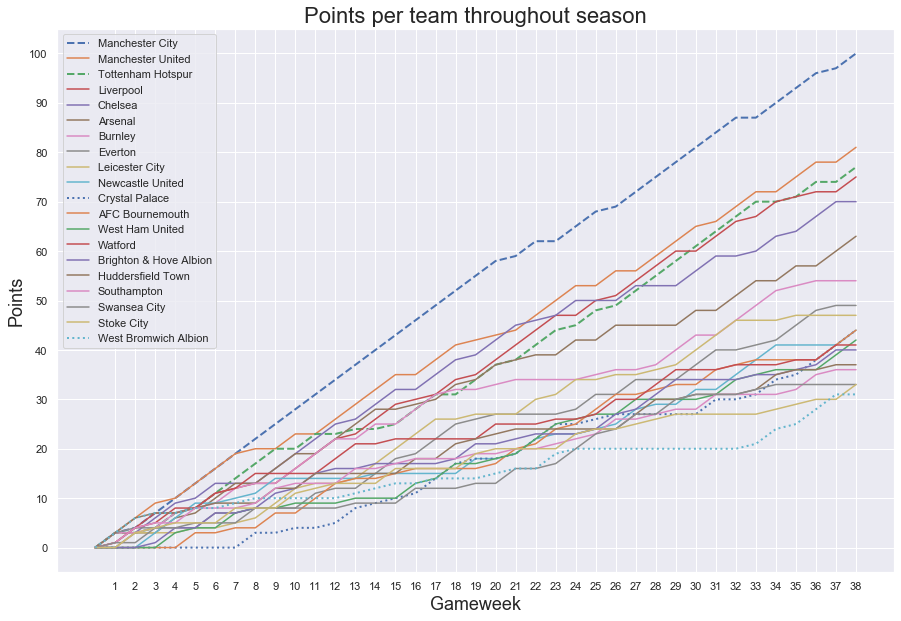

In [28]:
for team in ordered_table:
    points = [0] #we add a 0 at the beginning of the list to improve visualization 
    dftest = df_1.loc[(df_1['home_team'] == team) | (df_1['away_team'] == team)].sort_values(by='gameweek')
    for index,row in dftest.iterrows():
        if (row['winner'] == team):
            points.append(3)
        elif (row['loser'] == team):  
            points.append(0)      
        else:
            points.append(1)
    
    
    running_points = list(cumsum(points)) #we compute a running sum of each team's points to have their points after each gameweek
    
    fig = plt.figure(1, figsize=(15, 10))
    
    if team in highest_winning_teams: #we plot differently the 2 teams with longest winning streaks
        plt.plot(running_points, label = team,linestyle='dashed',linewidth=2)
    elif team in highest_losing_teams: #we plot differently the 2 teams with longest losing streaks
        plt.plot(running_points, label = team,linestyle='dotted',linewidth=2)
    else: #if no particular streak, we plot normally
        plt.plot(running_points, label = team,linestyle='solid')   

    
plt.legend()
plt.title('Points per team throughout season',size=22)
plt.xticks(np.arange(1,39))
plt.yticks(np.arange(0,105,step=10))
plt.xlabel('Gameweek',size=18)
plt.ylabel('Points',size=18)

print("The 2 teams with longest winning streaks are displayed with dashed lines \nThe 2 teams with longest losing streaks are displayed with dotted lines \n")

## RQ2) Is there a home-field advantage?

In [29]:
#We randomly choose our 5 teams

import random

temp = ordered_table.copy()
teams_list_5 = []
for i in range(5):
    teams_list_5.append(temp.pop(random.randint(0,len(temp)-1)))

In [30]:
teams_list_5

['Southampton', 'Manchester City', 'Chelsea', 'Liverpool', 'Watford']

In [31]:
# however, as we use team names in our analysis right below, we have to select 5 teams manually
# so let's select Arsenal, Manchester City, Leicester City, Watford and Southampton

teams_list_5 = ['Arsenal','Manchester City','Leicester City','Watford','Southampton']
teams_list_5

['Arsenal', 'Manchester City', 'Leicester City', 'Watford', 'Southampton']

In [32]:
from scipy import stats

chi_list = []

for team in teams_list_5:
    df_temp = df_1.loc[(df_1['home_team'] == team) | (df_1['away_team'] == team)]
    results = []
    side = []
    for index,row in df_temp.iterrows():
        if row['winner'] != 'Draw':
            if row['winner'] == team:
                results.append('win')
            else:
                results.append("loss")
        else: 
            results.append("draw")
        if row['home_team'] == team:
            side.append("home")
        else:
            side.append("away")
    df_results = pd.DataFrame(results, columns = ["results"])
    df_sides = pd.DataFrame(side, columns = ["side"])
    df_concat = pd.concat([df_results, df_sides], axis = 1)
    df_crosstab = pd.crosstab(df_concat['side'],df_concat['results'])      
    f_obs = np.array([df_crosstab.iloc[0][1:3].values,df_crosstab.iloc[1][1:3].values])
    
    print(team,df_crosstab,'',sep='\n')

    chi_list.append([team,stats.chi2_contingency(f_obs)[0:3]])

Arsenal
results  draw  loss  win
side                    
away        4    11    4
home        2     2   15

Manchester City
results  draw  loss  win
side                    
away        2     1   16
home        2     1   16

Leicester City
results  draw  loss  win
side                    
away        5     9    5
home        6     6    7

Watford
results  draw  loss  win
side                    
away        2    13    4
home        6     6    7

Southampton
results  draw  loss  win
side                    
away        8     8    3
home        7     8    4



In [33]:
chi_list[0]

#after team's name, the third value is the p-value

['Arsenal', (10.100690640628722, 0.0014821376819429844, 1)]

#### Null hypothesis H0 is that the field doesn't significantly impact the result. We can reject it if the p-value < 0,05
#### We notice that the first p-value (from Arsenal) is significantly lower than 0,05, which enables us to reject the null hypothesis and state that the field significantly impact on Arsenal's results. Indeed, if we take a look at their results we can see that they won almost all their home games (15 out of 19), and lost a lot of away games (11 out of 19), which confirms the huge impact of the field

In [34]:
chi_list[1]

#after team's name, the third value is the p-value

['Manchester City', (0.0, 1.0, 1)]

#### Null hypothesis H0 is that the field doesn't significantly impact the result. We can reject it if the p-value < 0,05

#### If we take a look at other teams and p-values, we even have a p-value of 1 for Manchester City (which is normal considering that they have exactly the same number of draw, loss and wins at home and away). This is a totally opposite result compared to Arsenal

## RQ3) Which teams have the youngest coaches?

In [35]:
df_coaches

,wyId,shortName,firstName,middleName,lastName,birthDate,birthArea,passportArea,currentTeamId
0,275580,Cesar Domingo,César Domingo,,Mendiondo López,None,"{'id': 76, 'alpha2code': 'BR', 'alpha3code': '...","{'id': 76, 'alpha2code': 'BR', 'alpha3code': '...",0
1,14710,J. Heynckes,Josef,,Heynckes,1945-05-09,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...","{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...",0
2,135480,G. De Biasi,Giovanni,,De Biasi,1956-06-16,"{'id': 380, 'alpha2code': 'IT', 'alpha3code': ...","{'id': 380, 'alpha2code': 'IT', 'alpha3code': ...",0
3,210074,Marcelino,Marcelino,,García Toral,1965-08-14,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...","{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",674
4,293398,T. Korkut,Tayfun,,Korkut,1974-04-02,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...","{'id': 792, 'alpha2code': 'TR', 'alpha3code': ...",0
...,...,...,...,...,...,...,...,...,...
203,264939,José Miguel Campos,José Miguel,,Campos Rodríguez,1966-08-12,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...","{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",0
204,26213,M. Der Zakarian,Michel,,Der Zakarian,1963-02-18,"{'id': 51, 'alpha2code': 'AM', 'alpha3code': '...","{'id': 51, 'alpha2code': 'AM', 'alpha3code': '...",3787
205,7845,A. Wenger,Arsène,,Wenger,1949-10-22,"{'id': 250, 'alpha2code': 'FR', 'alpha3code': ...","{'id': 250, 'alpha2code': 'FR', 'alpha3code': ...",0
206,3485,Mendilibar,José Luis,,Mendilibar Etxebarria,1961-03-14,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...","{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",701


In [36]:
df_teams

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,Vitoria-Gasteiz,Deportivo Alavés,696,Deportivo Alavés,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
...,...,...,...,...,...,...
137,Las Rozas,Spain,1598,Spain,"{'name': 'Spain', 'id': 724, 'alpha3code': 'ES...",national
138,Beograd,Serbia,17322,Serbia,"{'name': 'Serbia', 'id': 688, 'alpha3code': 'S...",national
139,Bern,Switzerland,6697,Switzerland,"{'name': 'Switzerland', 'id': 756, 'alpha3code...",national
140,Warszawa,Poland,13869,Poland,"{'name': 'Poland', 'id': 616, 'alpha3code': 'P...",national


In [37]:
#we only keep Premier League teams

df_teams_PL = df_teams.loc[df_teams['name'].isin(PL_teams)].reset_index(drop=True)
df_teams_PL

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,"Huddersfield, West Yorkshire",Huddersfield Town,1673,Huddersfield Town FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
2,Swansea,Swansea City,10531,Swansea City AFC,"{'name': 'Wales', 'id': '0', 'alpha3code': 'XW...",club
3,"Bournemouth, Dorset",AFC Bournemouth,1659,AFC Bournemouth,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
4,"Brighton, East Sussex",Brighton & Hove Albion,1651,Brighton & Hove Albion FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
5,"Burnley, Lancashire",Burnley,1646,Burnley FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
6,Leicester,Leicester City,1631,Leicester City FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
7,London,West Ham United,1633,West Ham United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
8,Stoke-on-Trent,Stoke City,1639,Stoke City FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
9,Watford,Watford,1644,Watford FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club


In [38]:
df_teams_coaches = pd.merge(df_teams_PL, df_coaches, left_on='wyId', right_on='currentTeamId')
df_teams_coaches

,city,name,wyId_x,officialName,area,type,wyId_y,shortName,firstName,middleName,lastName,birthDate,birthArea,passportArea,currentTeamId
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,210700,Rafael Benítez,Rafael,,Benítez Maudes,1960-04-16,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...","{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",1613
1,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,531745,Paco,Francisco,,de Míguel Moreno,1973-02-19,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...","{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",1613
2,"Bournemouth, Dorset",AFC Bournemouth,1659,AFC Bournemouth,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,8934,E. Howe,Eddie,,Howe,1977-11-29,"{'id': 826, 'alpha2code': 'EN', 'alpha3code': ...","{'id': 826, 'alpha2code': 'EN', 'alpha3code': ...",1659
3,"Brighton, East Sussex",Brighton & Hove Albion,1651,Brighton & Hove Albion FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,8093,C. Hughton,Chris,,Hughton,1958-12-11,"{'id': 826, 'alpha2code': 'EN', 'alpha3code': ...","{'id': 372, 'alpha2code': 'IE', 'alpha3code': ...",1651
4,"Burnley, Lancashire",Burnley,1646,Burnley FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,8880,S. Dyche,Sean,,Dyche,1971-06-28,"{'id': 826, 'alpha2code': 'EN', 'alpha3code': ...","{'id': 826, 'alpha2code': 'EN', 'alpha3code': ...",1646
5,Watford,Watford,1644,Watford FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,93112,Javi Gracia,Javier,,Gracia Carlos,1970-05-01,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...","{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",1644
6,Liverpool,Everton,1623,Everton FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,71037,Marco Silva,Marco Alexandre,,Saraiva da Silva,1977-07-12,"{'id': 620, 'alpha2code': 'PT', 'alpha3code': ...","{'id': 620, 'alpha2code': 'PT', 'alpha3code': ...",1623
7,Manchester,Manchester City,1625,Manchester City FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,267136,Guardiola,Josep,,Guardiola i Sala,1971-01-18,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...","{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",1625
8,London,Tottenham Hotspur,1624,Tottenham Hotspur FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,292863,M. Pochettino,Mauricio Roberto,,Pochettino Trossero,1972-03-02,"{'id': 32, 'alpha2code': 'AR', 'alpha3code': '...","{'id': 32, 'alpha2code': 'AR', 'alpha3code': '...",1624
9,London,Crystal Palace,1628,Crystal Palace FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,8357,R. Hodgson,Roy,,Hodgson,1947-08-09,"{'id': 826, 'alpha2code': 'EN', 'alpha3code': ...","{'id': 826, 'alpha2code': 'EN', 'alpha3code': ...",1628


In [39]:
#We notice we only have 14 coaches for Premier League, with Newcastle even having 2 coaches ==> only 13 clubs have a coach

In [40]:
#Let's only keep useful columns to simplify

df_3_2 = df_teams_coaches[['name','birthDate','shortName']]

In [41]:
df_3_2

,name,birthDate,shortName
0,Newcastle United,1960-04-16,Rafael Benítez
1,Newcastle United,1973-02-19,Paco
2,AFC Bournemouth,1977-11-29,E. Howe
3,Brighton & Hove Albion,1958-12-11,C. Hughton
4,Burnley,1971-06-28,S. Dyche
5,Watford,1970-05-01,Javi Gracia
6,Everton,1977-07-12,Marco Silva
7,Manchester City,1971-01-18,Guardiola
8,Tottenham Hotspur,1972-03-02,M. Pochettino
9,Crystal Palace,1947-08-09,R. Hodgson


In [42]:
# we create a function computing the age from a given date

from datetime import date

def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [43]:
# then we calculate the age of each coach

age_list = []
date_list = []

for index,row in df_3_2.iterrows():
    date_format = row['birthDate'].split('-')
    age_list.append(calculate_age(date(int(date_format[0]),int(date_format[1]),int(date_format[2]))))

In [44]:
df_3_2['age'] = age_list

C:\Users\Nathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
# Show only first 10 teams with youngest coaches

df_3_2.sort_values(by=['birthDate'],ascending=False).head(n=10).reset_index(drop=True)

,name,birthDate,shortName,age
0,AFC Bournemouth,1977-11-29,E. Howe,41
1,Everton,1977-07-12,Marco Silva,42
2,Newcastle United,1973-02-19,Paco,46
3,Tottenham Hotspur,1972-03-02,M. Pochettino,47
4,Arsenal,1971-11-03,Unai Emery,47
5,Burnley,1971-06-28,S. Dyche,48
6,Manchester City,1971-01-18,Guardiola,48
7,Watford,1970-05-01,Javi Gracia,49
8,Southampton,1967-08-09,R. Hasenhüttl,52
9,Liverpool,1967-06-16,J. Klopp,52


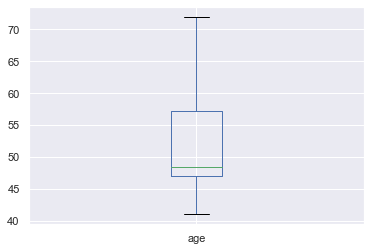

In [46]:
# Plotting the boxplot

df_3_2.boxplot(column=['age'])
plt.show()

In [47]:
# However having only 14 coaches is not enough. Let's try to get our coaches data in another way

In [48]:
df_matches_PL

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId,home_team,away_team,home_score,away_score,loser
0,Played,4405654,38,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",181150,2018-05-13 14:00:00,AFC Bournemouth,Turf Moor,2500089,"Burnley - AFC Bournemouth, 1 - 2","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",Regular,364,Burnley,AFC Bournemouth,1,2,Burnley
1,Played,4405654,38,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",181150,2018-05-13 14:00:00,Crystal Palace,Selhurst Park,2500090,"Crystal Palace - West Bromwich Albion, 2 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381851, 'role': 'referee'}, {'r...",Regular,364,Crystal Palace,West Bromwich Albion,2,0,West Bromwich Albion
2,Played,4405654,38,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2018-05-13 14:00:00,Arsenal,The John Smith's Stadium,2500091,"Huddersfield Town - Arsenal, 0 - 1","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 384965, 'role': 'referee'}, {'r...",Regular,364,Huddersfield Town,Arsenal,0,1,Huddersfield Town
3,Played,4405654,38,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",181150,2018-05-13 14:00:00,Liverpool,Anfield,2500092,"Liverpool - Brighton & Hove Albion, 4 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385704, 'role': 'referee'}, {'r...",Regular,364,Liverpool,Brighton & Hove Albion,4,0,Brighton & Hove Albion
4,Played,4405654,38,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",181150,2018-05-13 14:00:00,Manchester United,Old Trafford,2500093,"Manchester United - Watford, 1 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381853, 'role': 'referee'}, {'r...",Regular,364,Manchester United,Watford,1,0,Watford
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Played,4405654,1,"{'1623': {'scoreET': 0, 'coachId': 268779, 'si...",181150,2017-08-12 14:00:00,Everton,Goodison Park,2499723,"Everton - Stoke City, 1 - 0","August 12, 2017 at 4:00:00 PM GMT+2","[{'refereeId': 385915, 'role': 'referee'}, {'r...",Regular,364,Everton,Stoke City,1,0,Stoke City
376,Played,4405654,1,"{'10531': {'scoreET': 0, 'coachId': 381291, 's...",181150,2017-08-12 14:00:00,Draw,St. Mary's Stadium,2499726,"Southampton - Swansea City, 0 - 0","August 12, 2017 at 4:00:00 PM GMT+2","[{'refereeId': 385916, 'role': 'referee'}, {'r...",Regular,364,Southampton,Swansea City,0,0,Draw
377,Played,4405654,1,"{'1659': {'scoreET': 0, 'coachId': 8934, 'side...",181150,2017-08-12 14:00:00,West Bromwich Albion,The Hawthorns,2499728,"West Bromwich Albion - AFC Bournemouth, 1 - 0","August 12, 2017 at 4:00:00 PM GMT+2","[{'refereeId': 379443, 'role': 'referee'}, {'r...",Regular,364,West Bromwich Albion,AFC Bournemouth,1,0,AFC Bournemouth
378,Played,4405654,1,"{'1644': {'scoreET': 0, 'coachId': 71037, 'sid...",181150,2017-08-12 11:30:00,Draw,Vicarage Road Stadium,2499727,"Watford - Liverpool, 3 - 3","August 12, 2017 at 1:30:00 PM GMT+2","[{'refereeId': 378952, 'role': 'referee'}, {'r...",Regular,364,Watford,Liverpool,3,3,Draw


In [49]:
# We dig into the 'teamsData' to extract the coach of each home and away team, 
# using the powerful re library and some regular expressions

home_coach = []
away_coach = []

for index,row in df_matches_PL.iterrows():
    text = str(row['teamsData'])
    ids = re.findall('coachId(.+?),', text)
    coachId1 = int(re.findall('\d+',ids[0])[0])
    coachId2 = int(re.findall('\d+',ids[1])[0])
    sides = re.findall('side(.+?),', text)
    side1 = "".join(re.split("[^a-zA-Z]*", sides[0]))
    side2 = "".join(re.split("[^a-zA-Z]*", sides[1]))
    if side1 == 'home':
        home_coach.append(coachId1)
        away_coach.append(coachId2)
    elif side1 == 'away':
        home_coach.append(coachId2)
        away_coach.append(coachId1)
        
    
df_matches_PL['home_coachId'] = home_coach
df_matches_PL['away_coachId'] = away_coach

In [50]:
# we concat home and away lists

test_coach = df_matches_PL['home_coachId'].tolist() + df_matches_PL['away_coachId'].tolist()
test_team = df_matches_PL['home_team'].tolist() + df_matches_PL['away_team'].tolist()

In [51]:
df_team_coach_PL = pd.DataFrame(list(zip(test_team, test_coach)), columns =['team', 'coachId'])

In [52]:
df_team_coach_PL.sort_values(by=['team'])

,team,coachId
59,AFC Bournemouth,8934
283,AFC Bournemouth,8934
453,AFC Bournemouth,8934
430,AFC Bournemouth,8934
314,AFC Bournemouth,8934
...,...,...
536,West Ham United,8235
318,West Ham United,269869
610,West Ham United,8235
737,West Ham United,269869


In [53]:
# we drop duplicate rows

deduplicated_df = df_team_coach_PL.drop_duplicates()

In [54]:
# we drop rows with coachId = 0 (with is mainly due to missing data)

deduplicated_df = deduplicated_df[deduplicated_df['coachId'] != 0].reset_index(drop=True)
deduplicated_df

,team,coachId
0,Burnley,8880
1,Crystal Palace,8357
2,Huddersfield Town,18572
3,Liverpool,14791
4,Manchester United,3295
5,Newcastle United,210700
6,Southampton,9054
7,Swansea City,32573
8,Tottenham Hotspur,3782
9,West Ham United,8235


In [55]:
# we merge our cleaned dataset with the coaches one to get the coaches information

coaches_df = pd.merge(deduplicated_df, df_coaches[['wyId','shortName','birthDate']], how='left', left_on='coachId', right_on='wyId')

In [56]:
coaches_df = coaches_df.dropna()

In [57]:
coaches_df

,team,coachId,wyId,shortName,birthDate
0,Burnley,8880,8880.0,S. Dyche,1971-06-28
1,Crystal Palace,8357,8357.0,R. Hodgson,1947-08-09
2,Huddersfield Town,18572,18572.0,D. Wagner,1971-10-19
3,Liverpool,14791,14791.0,J. Klopp,1967-06-16
4,Manchester United,3295,3295.0,José Mourinho,1963-01-26
5,Newcastle United,210700,210700.0,Rafael Benítez,1960-04-16
6,Southampton,9054,9054.0,M. Hughes,1963-11-01
7,Swansea City,32573,32573.0,Carlos Carvalhal,1965-12-04
9,West Ham United,8235,8235.0,D. Moyes,1963-04-25
10,Manchester City,267136,267136.0,Guardiola,1971-01-18


In [58]:
# we compute the age of each coach

age_list = []

for index,row in coaches_df.iterrows():
    date_format = row['birthDate'].split('-')
    age_list.append(calculate_age(date(int(date_format[0]),int(date_format[1]),int(date_format[2]))))

In [59]:
coaches_df['age'] = age_list

In [60]:
# we only keep useful information

coaches_df2 = coaches_df[['team','shortName','birthDate','age']].sort_values(by=['birthDate'],ascending=False).reset_index(drop=True)

In [61]:
coaches_df2

,team,shortName,birthDate,age
0,AFC Bournemouth,E. Howe,1977-11-29,41
1,Watford,Marco Silva,1977-07-12,42
2,Leicester City,M. Appleton,1975-12-04,43
3,Everton,D. Unsworth,1973-10-16,46
4,Newcastle United,Paco,1973-02-19,46
5,Tottenham Hotspur,M. Pochettino,1972-03-02,47
6,Swansea City,P. Clement,1972-01-08,47
7,Huddersfield Town,D. Wagner,1971-10-19,48
8,Southampton,M. Pellegrino,1971-10-05,48
9,Burnley,S. Dyche,1971-06-28,48


In [62]:
# we only want one coach per team, so we keep the youngest coach for each team

coaches_df3 = coaches_df2.drop_duplicates(subset ="team")

In [63]:
final_df_coaches = coaches_df3.sort_values(by=['birthDate'],ascending=False).reset_index(drop=True)

In [64]:
# here is our final ranking for the teams with yougest coaches!

final_df_coaches

,team,shortName,birthDate,age
0,AFC Bournemouth,E. Howe,1977-11-29,41
1,Watford,Marco Silva,1977-07-12,42
2,Leicester City,M. Appleton,1975-12-04,43
3,Everton,D. Unsworth,1973-10-16,46
4,Newcastle United,Paco,1973-02-19,46
5,Tottenham Hotspur,M. Pochettino,1972-03-02,47
6,Swansea City,P. Clement,1972-01-08,47
7,Huddersfield Town,D. Wagner,1971-10-19,48
8,Southampton,M. Pellegrino,1971-10-05,48
9,Burnley,S. Dyche,1971-06-28,48


In [65]:
#showing only top10

final_df_coaches.head(n=10)

,team,shortName,birthDate,age
0,AFC Bournemouth,E. Howe,1977-11-29,41
1,Watford,Marco Silva,1977-07-12,42
2,Leicester City,M. Appleton,1975-12-04,43
3,Everton,D. Unsworth,1973-10-16,46
4,Newcastle United,Paco,1973-02-19,46
5,Tottenham Hotspur,M. Pochettino,1972-03-02,47
6,Swansea City,P. Clement,1972-01-08,47
7,Huddersfield Town,D. Wagner,1971-10-19,48
8,Southampton,M. Pellegrino,1971-10-05,48
9,Burnley,S. Dyche,1971-06-28,48


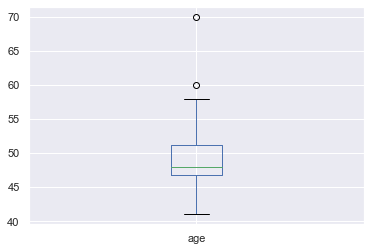

In [66]:
#and here is the matplotlib boxplot

final_df_coaches.boxplot(column=['age'])
plt.show()

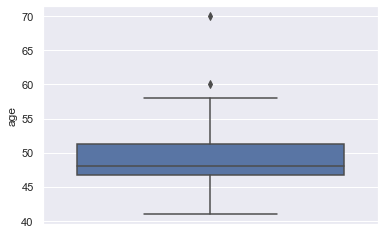

In [67]:
# here is the seaborn boxplot

sns.boxplot(y='age',data=final_df_coaches)
plt.show()

In [68]:
# The green line gives us the median
# The "box" representes the Interquartile Range (IQR), with values from Q1 to Q3
# The 2 points are for the 2 outliers that are higher than the maximum (calculated by the formula Q3 + 1.5*IQR), marked by the highest line
# The lowest line gives us the minimum, calculated by the formula Q1 - 1.5*IQR

## RQ4) Who are the best passers?

In [69]:
df_players

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,,Mandanda,3772,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,,O. Mandanda,null
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,,Konaté,2975,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konaté,null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3598,"{'name': 'Tunisia', 'id': 788, 'alpha3code': '...",72,Ali,,Maâloul,16041,1990-01-01,175,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Tunisia', 'id': 788, 'alpha3code': '...",120839,left,A. Maâloul,null
3599,"{'name': 'Peru', 'id': 604, 'alpha3code': 'PER...",76,Carlos Alberto,,Cáceda Oyaguez,15591,1991-09-27,183,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Peru', 'id': 604, 'alpha3code': 'PER...",114736,right,C. Cáceda,null
3600,"{'name': 'Peru', 'id': 604, 'alpha3code': 'PER...",78,Miguel Gianpierre,,Araujo Blanco,12072,1994-10-24,179,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Peru', 'id': 604, 'alpha3code': 'PER...",114908,right,M. Araujo,null
3601,"{'name': 'Morocco', 'id': 504, 'alpha3code': '...",70,Ahmed Reda,,Tagnaouti,16183,1996-04-05,182,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Morocco', 'id': 504, 'alpha3code': '...",285583,right,A. Tagnaouti,null


In [70]:
# we get the id of each PL team

list_id_teams_PL = df_teams_PL['wyId'].tolist()
list_id_teams_PL

[1613,
 1673,
 10531,
 1659,
 1651,
 1646,
 1631,
 1633,
 1639,
 1644,
 1623,
 1627,
 1625,
 1624,
 1628,
 1619,
 1612,
 1610,
 1611,
 1609]

In [71]:
#let's keep only players playing in PL

df_players_PL = df_players.loc[df_players['currentTeamId'].isin(list_id_teams_PL)].reset_index(drop=True)

In [72]:
df_players_PL

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",91,Toby,,Alderweireld,1624,1989-03-02,187,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Belgium', 'id': '56', 'alpha3code': ...",36,right,T. Alderweireld,5629
1,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",88,Jan,,Vertonghen,1624,1987-04-24,189,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Belgium', 'id': '56', 'alpha3code': ...",48,left,J. Vertonghen,5629
2,"{'name': 'Denmark', 'id': '208', 'alpha3code':...",76,Christian,,Dannemann Eriksen,1624,1992-02-14,180,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Denmark', 'id': '208', 'alpha3code':...",54,right,C. Eriksen,7712
3,"{'name': 'Iceland', 'id': '352', 'alpha3code':...",77,Johann,,Berg Guðmunds­son,1646,1990-10-27,186,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Iceland', 'id': '352', 'alpha3code':...",93,left,J. Guðmunds­son,7839
4,"{'name': 'Morocco', 'id': '504', 'alpha3code':...",80,Nacer,,Chadli,1627,1989-08-02,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Belgium', 'id': '56', 'alpha3code': ...",261,right,N. Chadli,5629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,"{'name': 'Spain', 'id': 724, 'alpha3code': 'ES...",69,Juan Marcos,,Foyth,1624,1998-01-12,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Argentina', 'id': 32, 'alpha3code': ...",456053,right,J. Foyth,12274
438,"{'name': 'Congo DR', 'id': 180, 'alpha3code': ...",72,Aaron,,Wan-Bissaka,1628,1997-11-26,183,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'England', 'id': 0, 'alpha3code': 'XE...",486252,right,A. Wan-Bissaka,2421
439,"{'name': 'Wales', 'id': 0, 'alpha3code': 'XWA'...",60,Jonathan,,Williams,1628,1993-10-09,168,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'England', 'id': 0, 'alpha3code': 'XE...",8421,right,J. Williams,null
440,"{'name': 'Ecuador', 'id': 218, 'alpha3code': '...",64,Jefferson Antonio,,Montero Vite,10531,1989-09-01,169,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Ecuador', 'id': 218, 'alpha3code': '...",3599,right,J. Montero,null


In [73]:
df_events_PL

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175
...,...,...,...,...,...,...,...,...,...,...,...,...
643145,5,Ball out of the field,[],0,"[{'y': 32, 'x': 0}, {'y': 100, 'x': 100}]",2500098,Interruption,1623,2H,2796.732525,50,251596409
643146,3,Corner,"[{'id': 302}, {'id': 801}, {'id': 1801}]",70965,"[{'y': 100, 'x': 100}, {'y': 47, 'x': 88}]",2500098,Free Kick,1633,2H,2829.821084,30,251596232
643147,1,Air duel,"[{'id': 701}, {'id': 1802}]",7919,"[{'y': 53, 'x': 12}, {'y': 50, 'x': 14}]",2500098,Duel,1623,2H,2831.211419,10,251596410
643148,1,Air duel,"[{'id': 703}, {'id': 1801}]",8005,"[{'y': 47, 'x': 88}, {'y': 50, 'x': 86}]",2500098,Duel,1633,2H,2832.434399,10,251596234


In [74]:
#Let's only keep passes!

df_passes_PL = df_events_PL.loc[df_events_PL['eventId'] == 8].reset_index(drop=True)
df_passes_PL

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175
...,...,...,...,...,...,...,...,...,...,...,...,...
328652,8,Simple pass,[{'id': 1801}],8313,"[{'y': 63, 'x': 65}, {'y': 96, 'x': 61}]",2500098,Pass,1633,2H,2760.286946,85,251596219
328653,8,Simple pass,[{'id': 1801}],379209,"[{'y': 96, 'x': 61}, {'y': 85, 'x': 40}]",2500098,Pass,1633,2H,2763.698599,85,251596221
328654,8,Simple pass,[{'id': 1801}],8561,"[{'y': 70, 'x': 59}, {'y': 89, 'x': 53}]",2500098,Pass,1633,2H,2783.137836,85,251596225
328655,8,High pass,[{'id': 1801}],20620,"[{'y': 89, 'x': 53}, {'y': 72, 'x': 99}]",2500098,Pass,1633,2H,2785.702032,83,251596226


In [75]:
# we determine if passes were successful or failed

pass_state = []

for index,row in df_passes_PL.iterrows():
    for value in row['tags'][-1].values():
        if value == 1801:
            pass_state.append('successful')
        elif value == 1802:
            pass_state.append('failed')

In [76]:
df_passes_PL['pass_status'] = pass_state

In [77]:
df_passes_PL

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,pass_status
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171,successful
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172,successful
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173,successful
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174,successful
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175,successful
...,...,...,...,...,...,...,...,...,...,...,...,...,...
328652,8,Simple pass,[{'id': 1801}],8313,"[{'y': 63, 'x': 65}, {'y': 96, 'x': 61}]",2500098,Pass,1633,2H,2760.286946,85,251596219,successful
328653,8,Simple pass,[{'id': 1801}],379209,"[{'y': 96, 'x': 61}, {'y': 85, 'x': 40}]",2500098,Pass,1633,2H,2763.698599,85,251596221,successful
328654,8,Simple pass,[{'id': 1801}],8561,"[{'y': 70, 'x': 59}, {'y': 89, 'x': 53}]",2500098,Pass,1633,2H,2783.137836,85,251596225,successful
328655,8,High pass,[{'id': 1801}],20620,"[{'y': 89, 'x': 53}, {'y': 72, 'x': 99}]",2500098,Pass,1633,2H,2785.702032,83,251596226,successful


In [78]:
# we merge passes and players

df_passes_players_PL = pd.merge(df_passes_PL, df_players_PL, left_on='playerId', right_on='wyId')
df_passes_players_PL

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,...,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,...,Lacazette,1609,1991-05-28,175,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...","{'name': 'France', 'id': 250, 'alpha3code': 'F...",25413,right,A. Lacazette,null
1,8,Head pass,[{'id': 1802}],25413,"[{'y': 70, 'x': 71}, {'y': 63, 'x': 71}]",2499719,Pass,1609,1H,397.881307,...,Lacazette,1609,1991-05-28,175,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...","{'name': 'France', 'id': 250, 'alpha3code': 'F...",25413,right,A. Lacazette,null
2,8,Simple pass,[{'id': 1802}],25413,"[{'y': 38, 'x': 30}, {'y': 0, 'x': 28}]",2499719,Pass,1609,1H,752.105957,...,Lacazette,1609,1991-05-28,175,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...","{'name': 'France', 'id': 250, 'alpha3code': 'F...",25413,right,A. Lacazette,null
3,8,Simple pass,[{'id': 1801}],25413,"[{'y': 33, 'x': 72}, {'y': 23, 'x': 61}]",2499719,Pass,1609,1H,1253.590895,...,Lacazette,1609,1991-05-28,175,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...","{'name': 'France', 'id': 250, 'alpha3code': 'F...",25413,right,A. Lacazette,null
4,8,Simple pass,[{'id': 1801}],25413,"[{'y': 61, 'x': 71}, {'y': 54, 'x': 72}]",2499719,Pass,1609,1H,1444.541524,...,Lacazette,1609,1991-05-28,175,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...","{'name': 'France', 'id': 250, 'alpha3code': 'F...",25413,right,A. Lacazette,null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300322,8,Simple pass,[{'id': 1801}],399564,"[{'y': 67, 'x': 29}, {'y': 90, 'x': 55}]",2500096,Pass,1639,2H,1065.578909,...,Sørensen,1639,1999-10-21,185,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Denmark', 'id': 208, 'alpha3code': '...",399564,right,L. Sørensen,7714
300323,8,Simple pass,[{'id': 1801}],399564,"[{'y': 49, 'x': 37}, {'y': 66, 'x': 42}]",2500096,Pass,1639,2H,1086.870983,...,Sørensen,1639,1999-10-21,185,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Denmark', 'id': 208, 'alpha3code': '...",399564,right,L. Sørensen,7714
300324,8,Simple pass,[{'id': 1801}],399564,"[{'y': 49, 'x': 47}, {'y': 48, 'x': 59}]",2500096,Pass,1639,2H,1116.811315,...,Sørensen,1639,1999-10-21,185,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Denmark', 'id': 208, 'alpha3code': '...",399564,right,L. Sørensen,7714
300325,8,Simple pass,[{'id': 1802}],399564,"[{'y': 5, 'x': 46}, {'y': 0, 'x': 53}]",2500096,Pass,1639,2H,1276.749933,...,Sørensen,1639,1999-10-21,185,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Denmark', 'id': 208, 'alpha3code': '...",399564,right,L. Sørensen,7714


In [79]:
#we get a list with each PL player with at least one attempted pass

list_players_PL = df_passes_players_PL['shortName'].tolist()
list_players_PL = sorted(list(dict.fromkeys(list_players_PL))) #deduplicate and sort

In [80]:
len(list_players_PL)

401

In [81]:
# for each player, we compute the total attempted passed, total successful passes, 
# total failed passes, and ratio between successful and attempted passes

total_list = []
success_list = []
fail_list = []
ratio_list = []

for player in list_players_PL:
    success = 0
    fail = 0
    temp = df_passes_players_PL.loc[(df_passes_players_PL['shortName'] == player)]
    for index,row in temp.iterrows():
        if row['pass_status'] == 'successful':
            success += 1
        elif row['pass_status'] == 'failed':
            fail += 1
    total_passes = success+fail
    ratio = success / total_passes

    total_list.append(total_passes)
    success_list.append(success)
    fail_list.append(fail)
    ratio_list.append(ratio)

In [82]:
len(total_list)

401

In [83]:
# and we create a new dataset with these values

df_final_players_passes_PL = pd.DataFrame(list(zip(list_players_PL, total_list,success_list,fail_list,ratio_list)), columns = ['shortName', 'total_passes','successful_passes','failed_passes','ratio'])
df_final_players_passes_PL

,shortName,total_passes,successful_passes,failed_passes,ratio
0,A. Barnes,409,277,132,0.677262
1,A. Begović,612,507,105,0.828431
2,A. Carroll,183,129,54,0.704918
3,A. Christensen,1288,1211,77,0.940217
4,A. Cresswell,1350,1049,301,0.777037
...,...,...,...,...,...
396,Y. Benalouane,26,18,8,0.692308
397,Y. Kaboul,76,62,14,0.815789
398,Álvaro Morata,499,383,116,0.767535
399,İ. Gündoğan,1350,1263,87,0.935556


In [84]:
df_final_players_passes_PL.sort_values(by=['ratio'],ascending=False).head(n=10).reset_index(drop=True)

,shortName,total_passes,successful_passes,failed_passes,ratio
0,P. Souaré,9,9,0,1.000000
1,R. Harper,4,4,0,1.000000
2,M. Obafemi,1,1,0,1.000000
3,E. Ampadu,18,18,0,1.000000
4,J. Simpson,6,6,0,1.000000
5,J. Stones,1204,1175,29,0.975914
6,F. Delph,1584,1497,87,0.945076
7,V. Kompany,1391,1312,79,0.943206
8,A. Christensen,1288,1211,77,0.940217
9,P. Jones,1057,992,65,0.938505


In [85]:
# keeping players with at least 40 passes attempted

df_final_3_4 = df_final_players_passes_PL[df_final_players_passes_PL['total_passes'] >= 40]

In [86]:
# and here is the top10 players with highest passing ratio

df_final_3_4.sort_values(by=['ratio'],ascending=False).head(n=10).reset_index(drop=True)

,shortName,total_passes,successful_passes,failed_passes,ratio
0,J. Stones,1204,1175,29,0.975914
1,F. Delph,1584,1497,87,0.945076
2,V. Kompany,1391,1312,79,0.943206
3,A. Christensen,1288,1211,77,0.940217
4,P. Jones,1057,992,65,0.938505
5,N. Otamendi,2964,2779,185,0.937584
6,Mohamed Elneny,834,781,53,0.936451
7,İ. Gündoğan,1350,1263,87,0.935556
8,V. Lindelöf,729,682,47,0.935528
9,M. Dembélé,1365,1273,92,0.932601


## RQ5) Does being a tall player mean winning more air duels?

In [87]:
#Let's only keep air duels

df_air_duels_PL = df_events_PL.loc[df_events_PL['subEventId'] == 10].reset_index(drop=True)
df_air_duels_PL

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,1,Air duel,"[{'id': 701}, {'id': 1802}]",8013,"[{'y': 15, 'x': 39}, {'y': 20, 'x': 33}]",2499719,Duel,1631,1H,14.765321,10,177959189
1,1,Air duel,"[{'id': 703}, {'id': 1801}]",0,"[{'y': 85, 'x': 61}, {'y': 80, 'x': 67}]",2499719,Duel,1609,1H,14.765321,10,177961218
2,1,Air duel,"[{'id': 703}, {'id': 1801}]",8653,"[{'y': 46, 'x': 29}, {'y': 41, 'x': 50}]",2499719,Duel,1631,1H,21.878309,10,177959191
3,1,Air duel,"[{'id': 701}, {'id': 1802}]",25413,"[{'y': 54, 'x': 71}, {'y': 59, 'x': 50}]",2499719,Duel,1609,1H,22.551816,10,177959181
4,1,Air duel,"[{'id': 703}, {'id': 1801}]",192748,"[{'y': 56, 'x': 60}, {'y': 49, 'x': 56}]",2499719,Duel,1631,1H,47.717508,10,177959210
...,...,...,...,...,...,...,...,...,...,...,...,...
37755,1,Air duel,"[{'id': 703}, {'id': 1801}]",37725,"[{'y': 39, 'x': 38}, {'y': 26, 'x': 46}]",2500098,Duel,1633,2H,1999.270595,10,251596054
37756,1,Air duel,"[{'id': 701}, {'id': 1802}]",56,"[{'y': 43, 'x': 95}, {'y': 38, 'x': 92}]",2500098,Duel,1623,2H,2379.824319,10,251596358
37757,1,Air duel,"[{'id': 703}, {'id': 1801}]",8313,"[{'y': 57, 'x': 5}, {'y': 62, 'x': 8}]",2500098,Duel,1633,2H,2381.046573,10,251596102
37758,1,Air duel,"[{'id': 701}, {'id': 1802}]",7919,"[{'y': 53, 'x': 12}, {'y': 50, 'x': 14}]",2500098,Duel,1623,2H,2831.211419,10,251596410


In [88]:
# for each duel, we check if it is successful or failed

air_duels_state = []

for index,row in df_air_duels_PL.iterrows():
    for value in row['tags'][-1].values():
        if value == 1801:
            air_duels_state.append('successful')
        elif value == 1802:
            air_duels_state.append('failed')

In [89]:
df_air_duels_PL['air_duel_status'] = air_duels_state
df_air_duels_PL

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,air_duel_status
0,1,Air duel,"[{'id': 701}, {'id': 1802}]",8013,"[{'y': 15, 'x': 39}, {'y': 20, 'x': 33}]",2499719,Duel,1631,1H,14.765321,10,177959189,failed
1,1,Air duel,"[{'id': 703}, {'id': 1801}]",0,"[{'y': 85, 'x': 61}, {'y': 80, 'x': 67}]",2499719,Duel,1609,1H,14.765321,10,177961218,successful
2,1,Air duel,"[{'id': 703}, {'id': 1801}]",8653,"[{'y': 46, 'x': 29}, {'y': 41, 'x': 50}]",2499719,Duel,1631,1H,21.878309,10,177959191,successful
3,1,Air duel,"[{'id': 701}, {'id': 1802}]",25413,"[{'y': 54, 'x': 71}, {'y': 59, 'x': 50}]",2499719,Duel,1609,1H,22.551816,10,177959181,failed
4,1,Air duel,"[{'id': 703}, {'id': 1801}]",192748,"[{'y': 56, 'x': 60}, {'y': 49, 'x': 56}]",2499719,Duel,1631,1H,47.717508,10,177959210,successful
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37755,1,Air duel,"[{'id': 703}, {'id': 1801}]",37725,"[{'y': 39, 'x': 38}, {'y': 26, 'x': 46}]",2500098,Duel,1633,2H,1999.270595,10,251596054,successful
37756,1,Air duel,"[{'id': 701}, {'id': 1802}]",56,"[{'y': 43, 'x': 95}, {'y': 38, 'x': 92}]",2500098,Duel,1623,2H,2379.824319,10,251596358,failed
37757,1,Air duel,"[{'id': 703}, {'id': 1801}]",8313,"[{'y': 57, 'x': 5}, {'y': 62, 'x': 8}]",2500098,Duel,1633,2H,2381.046573,10,251596102,successful
37758,1,Air duel,"[{'id': 701}, {'id': 1802}]",7919,"[{'y': 53, 'x': 12}, {'y': 50, 'x': 14}]",2500098,Duel,1623,2H,2831.211419,10,251596410,failed


In [90]:
# we merge air duels and players

df_air_duels_players_PL = pd.merge(df_air_duels_PL, df_players_PL, left_on='playerId', right_on='wyId')
df_air_duels_players_PL

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,...,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,1,Air duel,"[{'id': 701}, {'id': 1802}]",8013,"[{'y': 15, 'x': 39}, {'y': 20, 'x': 33}]",2499719,Duel,1631,1H,14.765321,...,Albrighton,1631,1989-11-18,175,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'England', 'id': 0, 'alpha3code': 'XE...",8013,right,M. Albrighton,null
1,1,Air duel,"[{'id': 702}, {'id': 1801}]",8013,"[{'y': 22, 'x': 68}, {'y': 0, 'x': 75}]",2499719,Duel,1631,2H,1849.848781,...,Albrighton,1631,1989-11-18,175,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'England', 'id': 0, 'alpha3code': 'XE...",8013,right,M. Albrighton,null
2,1,Air duel,"[{'id': 701}, {'id': 1802}]",8013,"[{'y': 21, 'x': 29}, {'y': 27, 'x': 32}]",2499732,Duel,1631,2H,1576.643898,...,Albrighton,1631,1989-11-18,175,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'England', 'id': 0, 'alpha3code': 'XE...",8013,right,M. Albrighton,null
3,1,Air duel,"[{'id': 701}, {'id': 1802}]",8013,"[{'y': 5, 'x': 70}, {'y': 0, 'x': 48}]",2499732,Duel,1631,2H,2515.660502,...,Albrighton,1631,1989-11-18,175,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'England', 'id': 0, 'alpha3code': 'XE...",8013,right,M. Albrighton,null
4,1,Air duel,"[{'id': 703}, {'id': 1801}]",8013,"[{'y': 30, 'x': 90}, {'y': 36, 'x': 89}]",2499753,Duel,1631,1H,229.451539,...,Albrighton,1631,1989-11-18,175,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'England', 'id': 0, 'alpha3code': 'XE...",8013,right,M. Albrighton,null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31694,1,Air duel,"[{'id': 701}, {'id': 1802}]",21333,"[{'y': 65, 'x': 16}, {'y': 60, 'x': 9}]",2500084,Duel,1631,1H,1936.090910,...,Benalouane,1631,1987-03-28,185,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",21333,right,Y. Benalouane,16276
31695,1,Air duel,"[{'id': 703}, {'id': 1801}]",21333,"[{'y': 82, 'x': 79}, {'y': 84, 'x': 80}]",2500084,Duel,1631,2H,1393.719592,...,Benalouane,1631,1987-03-28,185,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",21333,right,Y. Benalouane,16276
31696,1,Air duel,"[{'id': 701}, {'id': 1802}]",21333,"[{'y': 43, 'x': 92}, {'y': 0, 'x': 0}]",2500084,Duel,1631,2H,2607.502318,...,Benalouane,1631,1987-03-28,185,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",21333,right,Y. Benalouane,16276
31697,1,Air duel,"[{'id': 703}, {'id': 1801}]",21333,"[{'y': 94, 'x': 72}, {'y': 100, 'x': 79}]",2500084,Duel,1631,2H,2690.871274,...,Benalouane,1631,1987-03-28,185,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",21333,right,Y. Benalouane,16276


In [91]:
# we get all players with at least one attempted air duel

list_players_air_duels_PL = df_air_duels_players_PL['shortName'].tolist()
list_players_air_duels_PL = sorted(list(dict.fromkeys(list_players_air_duels_PL))) #deduplicate and sort

In [92]:
len(list_players_air_duels_PL)

391

In [93]:
# for each player, we compute the total attempted air duels, total successful air duels, 
# total failed air duels, and ratio between successful and attempted air duels

total_list = []
success_list = []
fail_list = []
ratio_list = []

for player in list_players_air_duels_PL:
    success = 0
    fail = 0
    temp = df_air_duels_players_PL.loc[(df_air_duels_players_PL['shortName'] == player)]
    for index,row in temp.iterrows():
        if row['air_duel_status'] == 'successful':
            success += 1
        elif row['air_duel_status'] == 'failed':
            fail += 1
    total_air_duels = success+fail
    ratio = success / total_air_duels

    total_list.append(total_air_duels)
    success_list.append(success)
    fail_list.append(fail)
    ratio_list.append(ratio)

In [94]:
# we create a new dataset with all these information

df_final_players_air_duels_PL = pd.DataFrame(list(zip(list_players_air_duels_PL, total_list,success_list,fail_list,ratio_list)), columns = ['shortName', 'total_air_duels','successful_air_duels','failed_air_duels','ratio'])

In [95]:
df_final_players_air_duels_PL

,shortName,total_air_duels,successful_air_duels,failed_air_duels,ratio
0,A. Barnes,371,137,234,0.369272
1,A. Begović,22,20,2,0.909091
2,A. Carroll,153,100,53,0.653595
3,A. Christensen,96,77,19,0.802083
4,A. Cresswell,117,71,46,0.606838
...,...,...,...,...,...
386,Y. Benalouane,5,3,2,0.600000
387,Y. Kaboul,12,10,2,0.833333
388,Álvaro Morata,137,66,71,0.481752
389,İ. Gündoğan,16,5,11,0.312500


In [96]:
df_final_players_air_duels_PL.sort_values(by=['ratio'],ascending=False).head(n=10).reset_index(drop=True)

,shortName,total_air_duels,successful_air_duels,failed_air_duels,ratio
0,C. Bravo,2,2,0,1.0
1,M. Vorm,1,1,0,1.0
2,P. Gazzaniga,2,2,0,1.0
3,M. Dúbravka,5,5,0,1.0
4,K. Darlow,10,10,0,1.0
5,J. Speroni,2,2,0,1.0
6,J. Simpson,1,1,0,1.0
7,J. Hart,8,8,0,1.0
8,J. Butland,12,12,0,1.0
9,T. Heaton,2,2,0,1.0


In [97]:
df_3_5 = df_final_players_air_duels_PL[df_final_players_air_duels_PL['total_air_duels'] >= 5]

In [98]:
df_3_5.sort_values(by=['ratio'],ascending=False).head(n=10).reset_index(drop=True)

,shortName,total_air_duels,successful_air_duels,failed_air_duels,ratio
0,M. Ryan,19,19,0,1.000000
1,K. Darlow,10,10,0,1.000000
2,W. Hennessey,14,14,0,1.000000
3,M. Dúbravka,5,5,0,1.000000
4,J. Hart,8,8,0,1.000000
5,J. Butland,12,12,0,1.000000
6,B. Foster,10,10,0,1.000000
7,J. Pickford,27,26,1,0.962963
8,Ł. Fabiański,26,25,1,0.961538
9,N. Pope,24,23,1,0.958333


In [99]:
# we notice that we only have goalkeepers in our top 10, which can be logical 
# as winning air duels is a crucial part of their game (when opponents attempt crosses and take corners) : 
# a lost duel for a goalkeeper would almost always result in a goal

In [100]:
#Let's get the size of these players

df_final_3_5 = pd.merge(df_3_5, df_players_PL[['shortName','height']], left_on='shortName', right_on='shortName')
df_final_3_5

,shortName,total_air_duels,successful_air_duels,failed_air_duels,ratio,height
0,A. Barnes,371,137,234,0.369272,186
1,A. Begović,22,20,2,0.909091,199
2,A. Carroll,153,100,53,0.653595,193
3,A. Christensen,96,77,19,0.802083,188
4,A. Cresswell,117,71,46,0.606838,170
...,...,...,...,...,...,...
364,Y. Benalouane,5,3,2,0.600000,185
365,Y. Kaboul,12,10,2,0.833333,191
366,Álvaro Morata,137,66,71,0.481752,189
367,İ. Gündoğan,16,5,11,0.312500,180


In [101]:
# to make the scatter plot clearer, we define colors for each height range

temp_height_list = df_final_3_5['height'].tolist()
temp_ratio_list = df_final_3_5['ratio'].tolist()
colors = []

for height in temp_height_list:
    if height < 160:
        colors.append('yellow')
    elif height < 170:
        colors.append('orange')
    elif height < 180:
        colors.append('red')
    elif height < 190:
        colors.append('purple')
    elif height < 200:
        colors.append('green')
    else:
        colors.append('blue')
    

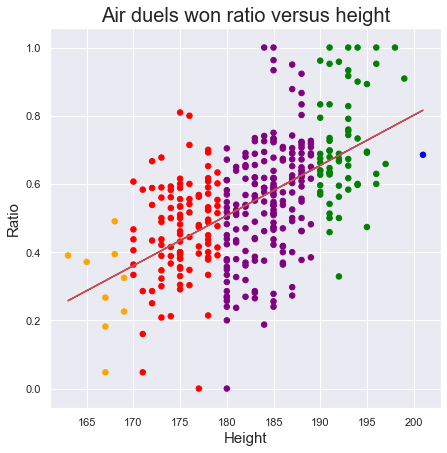

In [102]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(temp_height_list,temp_ratio_list)

def predict(x):
   return slope * x + intercept

fitLine = predict(np.array(temp_height_list))
fig = plt.figure(1, figsize=(7, 7))
plt.scatter(temp_height_list,y=temp_ratio_list,s=30,c=colors) 
plt.plot(temp_height_list, fitLine, c='r')
plt.title('Air duels won ratio versus height',size=20)
plt.xlabel('Height',size=15)
plt.ylabel('Ratio',size=15)
plt.show()

#### We clearly notice that the height positively impacts the ratio of air duels won

## RQ6) Free your mind!

In [103]:
df_events_PL

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175
...,...,...,...,...,...,...,...,...,...,...,...,...
643145,5,Ball out of the field,[],0,"[{'y': 32, 'x': 0}, {'y': 100, 'x': 100}]",2500098,Interruption,1623,2H,2796.732525,50,251596409
643146,3,Corner,"[{'id': 302}, {'id': 801}, {'id': 1801}]",70965,"[{'y': 100, 'x': 100}, {'y': 47, 'x': 88}]",2500098,Free Kick,1633,2H,2829.821084,30,251596232
643147,1,Air duel,"[{'id': 701}, {'id': 1802}]",7919,"[{'y': 53, 'x': 12}, {'y': 50, 'x': 14}]",2500098,Duel,1623,2H,2831.211419,10,251596410
643148,1,Air duel,"[{'id': 703}, {'id': 1801}]",8005,"[{'y': 47, 'x': 88}, {'y': 50, 'x': 86}]",2500098,Duel,1633,2H,2832.434399,10,251596234


In [104]:
#Let's re-use our passes df to see if the average pass completion ratio of a team has an impact on his final ranking at the end of the season

In [105]:
df_passes_PL

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,pass_status
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171,successful
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172,successful
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173,successful
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174,successful
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175,successful
...,...,...,...,...,...,...,...,...,...,...,...,...,...
328652,8,Simple pass,[{'id': 1801}],8313,"[{'y': 63, 'x': 65}, {'y': 96, 'x': 61}]",2500098,Pass,1633,2H,2760.286946,85,251596219,successful
328653,8,Simple pass,[{'id': 1801}],379209,"[{'y': 96, 'x': 61}, {'y': 85, 'x': 40}]",2500098,Pass,1633,2H,2763.698599,85,251596221,successful
328654,8,Simple pass,[{'id': 1801}],8561,"[{'y': 70, 'x': 59}, {'y': 89, 'x': 53}]",2500098,Pass,1633,2H,2783.137836,85,251596225,successful
328655,8,High pass,[{'id': 1801}],20620,"[{'y': 89, 'x': 53}, {'y': 72, 'x': 99}]",2500098,Pass,1633,2H,2785.702032,83,251596226,successful


In [106]:
df_teams_PL

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,"Huddersfield, West Yorkshire",Huddersfield Town,1673,Huddersfield Town FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
2,Swansea,Swansea City,10531,Swansea City AFC,"{'name': 'Wales', 'id': '0', 'alpha3code': 'XW...",club
3,"Bournemouth, Dorset",AFC Bournemouth,1659,AFC Bournemouth,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
4,"Brighton, East Sussex",Brighton & Hove Albion,1651,Brighton & Hove Albion FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
5,"Burnley, Lancashire",Burnley,1646,Burnley FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
6,Leicester,Leicester City,1631,Leicester City FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
7,London,West Ham United,1633,West Ham United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
8,Stoke-on-Trent,Stoke City,1639,Stoke City FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
9,Watford,Watford,1644,Watford FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club


In [107]:
PL_teams

['AFC Bournemouth',
 'Arsenal',
 'Brighton & Hove Albion',
 'Burnley',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Huddersfield Town',
 'Leicester City',
 'Liverpool',
 'Manchester City',
 'Manchester United',
 'Newcastle United',
 'Southampton',
 'Stoke City',
 'Swansea City',
 'Tottenham Hotspur',
 'Watford',
 'West Bromwich Albion',
 'West Ham United']

In [108]:
df_passes_teams_PL = pd.merge(df_passes_PL, df_teams_PL, left_on='teamId', right_on='wyId')

In [109]:
df_passes_teams_PL = df_passes_teams_PL.sort_values(by='name')
df_passes_teams_PL

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,pass_status,city,name,wyId,officialName,area,type
328656,8,Head pass,[{'id': 1802}],11669,"[{'y': 30, 'x': 61}, {'y': 53, 'x': 63}]",2500089,Pass,1659,2H,3010.063372,82,251701859,failed,"Bournemouth, Dorset",AFC Bournemouth,1659,AFC Bournemouth,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
318422,8,Simple pass,[{'id': 1801}],11669,"[{'y': 38, 'x': 14}, {'y': 38, 'x': 27}]",2499846,Pass,1659,2H,1351.866940,85,208945709,successful,"Bournemouth, Dorset",AFC Bournemouth,1659,AFC Bournemouth,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
318421,8,Smart pass,[{'id': 1802}],9285,"[{'y': 17, 'x': 82}, {'y': 18, 'x': 89}]",2499846,Pass,1659,2H,1257.172022,86,208945700,failed,"Bournemouth, Dorset",AFC Bournemouth,1659,AFC Bournemouth,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
318420,8,Simple pass,[{'id': 1801}],9293,"[{'y': 13, 'x': 89}, {'y': 17, 'x': 82}]",2499846,Pass,1659,2H,1256.518721,85,208945698,successful,"Bournemouth, Dorset",AFC Bournemouth,1659,AFC Bournemouth,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
318419,8,Simple pass,[{'id': 1801}],9285,"[{'y': 11, 'x': 69}, {'y': 13, 'x': 89}]",2499846,Pass,1659,2H,1249.954411,85,208945695,successful,"Bournemouth, Dorset",AFC Bournemouth,1659,AFC Bournemouth,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189276,8,Cross,"[{'id': 402}, {'id': 801}, {'id': 1802}]",41174,"[{'y': 14, 'x': 85}, {'y': 100, 'x': 100}]",2499837,Pass,1633,2H,2181.856175,80,207200012,failed,London,West Ham United,1633,West Ham United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
189277,8,Simple pass,[{'id': 1801}],8561,"[{'y': 93, 'x': 26}, {'y': 95, 'x': 31}]",2499837,Pass,1633,2H,2196.867816,85,207200024,successful,London,West Ham United,1633,West Ham United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
189278,8,Simple pass,[{'id': 1801}],8313,"[{'y': 95, 'x': 31}, {'y': 83, 'x': 21}]",2499837,Pass,1633,2H,2197.477957,85,207200026,successful,London,West Ham United,1633,West Ham United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
189280,8,Simple pass,[{'id': 1801}],8561,"[{'y': 67, 'x': 45}, {'y': 38, 'x': 45}]",2499837,Pass,1633,2H,2223.120475,85,207200038,successful,London,West Ham United,1633,West Ham United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club


In [110]:
# for each team, we compute the number of attempted passes, successful and failed passes, and the success ratio

total_list = []
success_list = []
fail_list = []
ratio_list = []

for team in PL_teams:
    success = 0
    fail = 0
    temp = df_passes_teams_PL.loc[(df_passes_teams_PL['name'] == team)]
    for index,row in temp.iterrows():
        if row['pass_status'] == 'successful':
            success += 1
        elif row['pass_status'] == 'failed':
            fail += 1
    total_passes = success+fail
    ratio = success / total_passes

    total_list.append(total_passes)
    success_list.append(success)
    fail_list.append(fail)
    ratio_list.append(ratio)

In [111]:
len(total_list)

20

In [112]:
df_final_teams_passes_PL = pd.DataFrame(list(zip(PL_teams, total_list,success_list,fail_list,ratio_list)), columns = ['name', 'total_passes','successful_passes','failed_passes','ratio'])

In [113]:
df_final_teams_passes_PL

,name,total_passes,successful_passes,failed_passes,ratio
0,AFC Bournemouth,15359,12463,2896,0.811446
1,Arsenal,22783,19728,3055,0.865909
2,Brighton & Hove Albion,13944,11121,2823,0.797547
3,Burnley,12765,9920,2845,0.777125
4,Chelsea,20467,17600,2867,0.859921
5,Crystal Palace,13510,10779,2731,0.797853
6,Everton,14044,11175,2869,0.795713
7,Huddersfield Town,14100,11112,2988,0.788085
8,Leicester City,14377,11374,3003,0.791125
9,Liverpool,22268,19137,3131,0.859395


In [114]:
#we re-use the list containing the end of season total points for each team

lst

[('AFC Bournemouth', 44),
 ('Arsenal', 63),
 ('Brighton & Hove Albion', 40),
 ('Burnley', 54),
 ('Chelsea', 70),
 ('Crystal Palace', 44),
 ('Everton', 49),
 ('Huddersfield Town', 37),
 ('Leicester City', 47),
 ('Liverpool', 75),
 ('Manchester City', 100),
 ('Manchester United', 81),
 ('Newcastle United', 44),
 ('Southampton', 36),
 ('Stoke City', 33),
 ('Swansea City', 33),
 ('Tottenham Hotspur', 77),
 ('Watford', 41),
 ('West Bromwich Albion', 31),
 ('West Ham United', 42)]

In [115]:
#we extract the total points

scores_list = [lst[i][1] for i in range(0,len(lst))]

In [116]:
scores_list

[44,
 63,
 40,
 54,
 70,
 44,
 49,
 37,
 47,
 75,
 100,
 81,
 44,
 36,
 33,
 33,
 77,
 41,
 31,
 42]

In [117]:
# and we add them to our dataset

df_final_teams_passes_PL['end_season_points'] = scores_list

In [118]:
df_final_teams_passes_PL

,name,total_passes,successful_passes,failed_passes,ratio,end_season_points
0,AFC Bournemouth,15359,12463,2896,0.811446,44
1,Arsenal,22783,19728,3055,0.865909,63
2,Brighton & Hove Albion,13944,11121,2823,0.797547,40
3,Burnley,12765,9920,2845,0.777125,54
4,Chelsea,20467,17600,2867,0.859921,70
5,Crystal Palace,13510,10779,2731,0.797853,44
6,Everton,14044,11175,2869,0.795713,49
7,Huddersfield Town,14100,11112,2988,0.788085,37
8,Leicester City,14377,11374,3003,0.791125,47
9,Liverpool,22268,19137,3131,0.859395,75


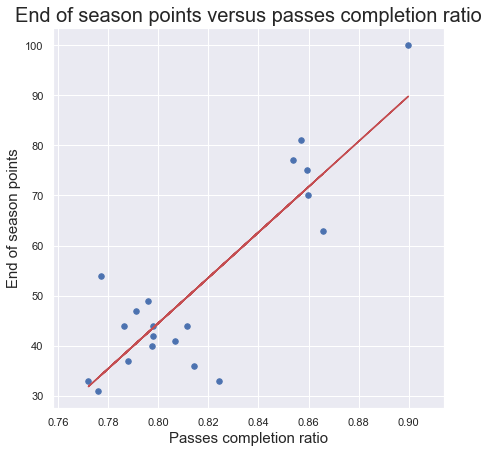

In [119]:
temp_ratio_list = df_final_teams_passes_PL['ratio'].tolist()
temp_score_list = df_final_teams_passes_PL['end_season_points'].tolist()

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(temp_ratio_list,temp_score_list)
def predict(x):
   return slope * x + intercept
fitLine = predict(np.array(temp_ratio_list))
fig = plt.figure(1, figsize=(7, 7))
plt.scatter(temp_ratio_list,y=temp_score_list,s=30) 
plt.plot(temp_ratio_list, fitLine, c='r')
plt.title('End of season points versus passes completion ratio',size=20)
plt.xlabel('Passes completion ratio',size=15)
plt.ylabel('End of season points',size=15)
plt.show()

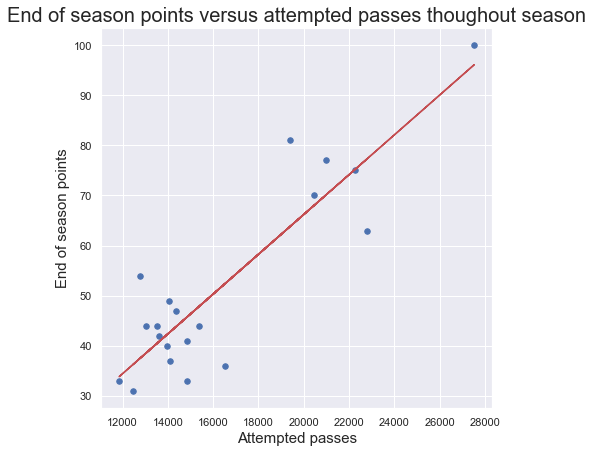

In [120]:
temp_passes_list = df_final_teams_passes_PL['total_passes'].tolist()
temp_score_list = df_final_teams_passes_PL['end_season_points'].tolist()

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(temp_passes_list,temp_score_list)
def predict(x):
   return slope * x + intercept
fitLine = predict(np.array(temp_passes_list))
fig = plt.figure(1, figsize=(7, 7))
plt.scatter(temp_passes_list,y=temp_score_list,s=30) 
plt.plot(temp_passes_list, fitLine, c='r')
plt.title('End of season points versus attempted passes thoughout season',size=20)
plt.xlabel('Attempted passes',size=15)
plt.ylabel('End of season points',size=15)
plt.show()

The scatter plots right above actually confirm the dominance of Premier League's Big Six, the 6 major clubs in England, almost always being the 6 best clubs at the end of the season. The PL Big Six is composed of: Manchester United, Manchester City, Liverpool, Tottenham, Chelsea and Arsenal. 

The plots show us that these 6 clubs all have the ball more often that their opponents and use it with more accuracy (at least for passes). We notice that Manchester City clearly stands out from the other 5 clubs with a better accuracy and many more attempted passes (and also many more points), which was predictible as their coach is Pep Guardiola, world-known for his love for beautiful game and possession football.

The 14 other clubs all have the ball less often and use it with less accuracy.

In [121]:
#We previously saw that height was a significant advantage in aerial duels. But what about the weight? And the body mass index (BMI)?

In [122]:
df_6 = pd.merge(df_3_5, df_players_PL[['shortName','height','weight']], left_on='shortName', right_on='shortName')
df_6

,shortName,total_air_duels,successful_air_duels,failed_air_duels,ratio,height,weight
0,A. Barnes,371,137,234,0.369272,186,76
1,A. Begović,22,20,2,0.909091,199,101
2,A. Carroll,153,100,53,0.653595,193,79
3,A. Christensen,96,77,19,0.802083,188,78
4,A. Cresswell,117,71,46,0.606838,170,66
...,...,...,...,...,...,...,...
364,Y. Benalouane,5,3,2,0.600000,185,79
365,Y. Kaboul,12,10,2,0.833333,191,87
366,Álvaro Morata,137,66,71,0.481752,189,85
367,İ. Gündoğan,16,5,11,0.312500,180,80


In [123]:
#Let's compute the BMI for our players!

df_6['BMI'] = round(df_6['weight'] / ((df_6['height'] / 100)**2),2)

In [124]:
df_6

,shortName,total_air_duels,successful_air_duels,failed_air_duels,ratio,height,weight,BMI
0,A. Barnes,371,137,234,0.369272,186,76,21.97
1,A. Begović,22,20,2,0.909091,199,101,25.50
2,A. Carroll,153,100,53,0.653595,193,79,21.21
3,A. Christensen,96,77,19,0.802083,188,78,22.07
4,A. Cresswell,117,71,46,0.606838,170,66,22.84
...,...,...,...,...,...,...,...,...
364,Y. Benalouane,5,3,2,0.600000,185,79,23.08
365,Y. Kaboul,12,10,2,0.833333,191,87,23.85
366,Álvaro Morata,137,66,71,0.481752,189,85,23.80
367,İ. Gündoğan,16,5,11,0.312500,180,80,24.69


In [125]:
# we use different colors for weight intervals in order to make the plot clearer

temp_weight_list = df_6['weight'].tolist()
temp_ratio_list = df_6['ratio'].tolist()
colors = []

for weight in temp_weight_list:
    if weight < 60:
        colors.append('yellow')
    elif weight < 70:
        colors.append('orange')
    elif weight < 80:
        colors.append('red')
    elif weight < 90:
        colors.append('purple')
    elif weight < 100:
        colors.append('green')
    else:
        colors.append('blue')

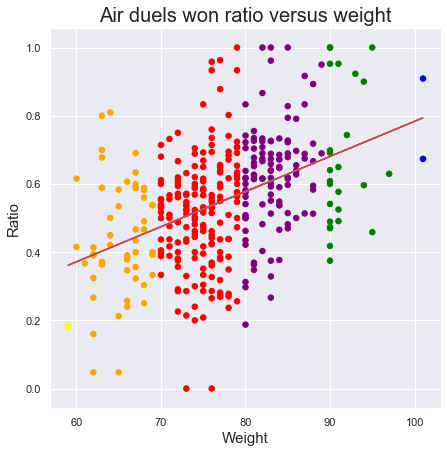

In [126]:
#and we plot!

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(temp_weight_list,temp_ratio_list)
def predict(x):
   return slope * x + intercept
fitLine = predict(np.array(temp_weight_list))
fig = plt.figure(1, figsize=(7, 7))
plt.scatter(temp_weight_list,y=temp_ratio_list,s=30,c=colors) 
plt.plot(temp_weight_list, fitLine, c='r')
plt.title('Air duels won ratio versus weight',size=20)
plt.xlabel('Weight',size=15)
plt.ylabel('Ratio',size=15)
plt.show()

In [127]:
# we use different colors for BMI intervals in order to make the plot clearer

temp_BMI_list = df_6['BMI'].tolist()
temp_ratio_list = df_6['ratio'].tolist()
colors = []

for BMI in temp_BMI_list:
    if BMI < 18.5:
        colors.append('yellow')
    elif BMI <= 25:
        colors.append('red')
    else:
        colors.append('blue')

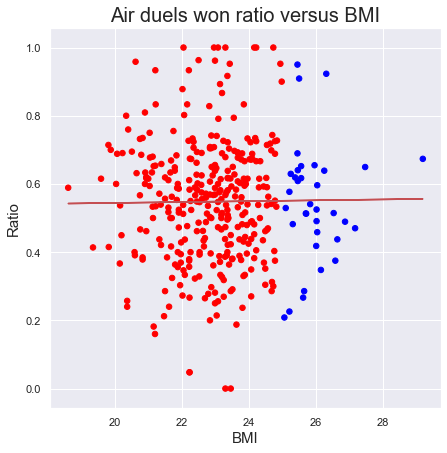

In [128]:
# and we plot!

from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(temp_BMI_list,temp_ratio_list)

def predict(x):
   return slope * x + intercept

fitLine = predict(np.array(temp_BMI_list))
fig = plt.figure(1, figsize=(7, 7))
plt.scatter(temp_BMI_list,y=temp_ratio_list,s=30,c=colors) 
plt.plot(temp_BMI_list, fitLine, c='r')
plt.title('Air duels won ratio versus BMI',size=20)
plt.xlabel('BMI',size=15)
plt.ylabel('Ratio',size=15)
plt.show()

## CRQ1) What are the time slots of the match with more goals?

#### i) Make a barplot with the absolute frequency of goals in all the time slots

In [129]:
df_events_PL

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175
...,...,...,...,...,...,...,...,...,...,...,...,...
643145,5,Ball out of the field,[],0,"[{'y': 32, 'x': 0}, {'y': 100, 'x': 100}]",2500098,Interruption,1623,2H,2796.732525,50,251596409
643146,3,Corner,"[{'id': 302}, {'id': 801}, {'id': 1801}]",70965,"[{'y': 100, 'x': 100}, {'y': 47, 'x': 88}]",2500098,Free Kick,1633,2H,2829.821084,30,251596232
643147,1,Air duel,"[{'id': 701}, {'id': 1802}]",7919,"[{'y': 53, 'x': 12}, {'y': 50, 'x': 14}]",2500098,Duel,1623,2H,2831.211419,10,251596410
643148,1,Air duel,"[{'id': 703}, {'id': 1801}]",8005,"[{'y': 47, 'x': 88}, {'y': 50, 'x': 86}]",2500098,Duel,1633,2H,2832.434399,10,251596234


In [130]:
event_types = df_events_PL['eventName'].tolist()
event_types = sorted(list(dict.fromkeys(event_types))) #deduplicate and sort

In [131]:
event_types

['Duel',
 'Foul',
 'Free Kick',
 'Goalkeeper leaving line',
 'Interruption',
 'Offside',
 'Others on the ball',
 'Pass',
 'Save attempt',
 'Shot']

In [132]:
# we only keep events potentially leading to goals

goal_events = ['Free Kick', 'Shot']

In [133]:
df_goal_events = df_events_PL.loc[df_events_PL['eventName'].isin(goal_events)]
df_goal_events

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
36,3,Free Kick,[{'id': 1801}],0,"[{'y': 44, 'x': 65}, {'y': 31, 'x': 65}]",2499719,Free Kick,1609,1H,74.737141,31,177959198
46,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,94.595788,100,177959212
59,3,Throw in,[{'id': 1801}],14853,"[{'y': 0, 'x': 94}, {'y': 41, 'x': 93}]",2499719,Free Kick,1631,1H,175.308128,36,177959244
62,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1211}, {'id'...",26150,"[{'y': 52, 'x': 85}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,179.854785,100,177959247
64,3,Goal kick,[],7882,"[{'y': 0, 'x': 0}, {'y': 44, 'x': 28}]",2499719,Free Kick,1609,1H,196.066859,34,177959227
...,...,...,...,...,...,...,...,...,...,...,...,...
643081,3,Throw in,[{'id': 1802}],21100,"[{'y': 0, 'x': 52}, {'y': 14, 'x': 76}]",2500098,Free Kick,1633,2H,2608.217550,36,251596122
643101,3,Free Kick,[{'id': 1801}],0,"[{'y': 87, 'x': 40}, {'y': 80, 'x': 56}]",2500098,Free Kick,1623,2H,2665.580593,31,251596391
643140,3,Free Kick,[{'id': 1801}],0,"[{'y': 81, 'x': 70}, {'y': 70, 'x': 59}]",2500098,Free Kick,1633,2H,2780.300522,31,251596224
643146,3,Corner,"[{'id': 302}, {'id': 801}, {'id': 1801}]",70965,"[{'y': 100, 'x': 100}, {'y': 47, 'x': 88}]",2500098,Free Kick,1633,2H,2829.821084,30,251596232


In [134]:
# for each shot and free kick, we check if it led to a goal or not

event_state = []

for index,row in df_goal_events.iterrows():
    if len(row['tags']) > 0:
        for value in row['tags'][0].values():
            if value == 101:
                event_state.append('goal')
            else:
                event_state.append('no goal')
    else:
        event_state.append('no_goal') 

In [135]:
len(event_state)

44874

In [136]:
# according to Wikipedia, there was 1018 goals this season, so we only have 30 missing values

event_state.count('goal')

988

In [137]:
df_goal_events['attempt_status'] = event_state

C:\Users\Nathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [138]:
df_goal_events

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,attempt_status
36,3,Free Kick,[{'id': 1801}],0,"[{'y': 44, 'x': 65}, {'y': 31, 'x': 65}]",2499719,Free Kick,1609,1H,74.737141,31,177959198,no goal
46,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,94.595788,100,177959212,goal
59,3,Throw in,[{'id': 1801}],14853,"[{'y': 0, 'x': 94}, {'y': 41, 'x': 93}]",2499719,Free Kick,1631,1H,175.308128,36,177959244,no goal
62,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1211}, {'id'...",26150,"[{'y': 52, 'x': 85}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,179.854785,100,177959247,no goal
64,3,Goal kick,[],7882,"[{'y': 0, 'x': 0}, {'y': 44, 'x': 28}]",2499719,Free Kick,1609,1H,196.066859,34,177959227,no_goal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
643081,3,Throw in,[{'id': 1802}],21100,"[{'y': 0, 'x': 52}, {'y': 14, 'x': 76}]",2500098,Free Kick,1633,2H,2608.217550,36,251596122,no goal
643101,3,Free Kick,[{'id': 1801}],0,"[{'y': 87, 'x': 40}, {'y': 80, 'x': 56}]",2500098,Free Kick,1623,2H,2665.580593,31,251596391,no goal
643140,3,Free Kick,[{'id': 1801}],0,"[{'y': 81, 'x': 70}, {'y': 70, 'x': 59}]",2500098,Free Kick,1633,2H,2780.300522,31,251596224,no goal
643146,3,Corner,"[{'id': 302}, {'id': 801}, {'id': 1801}]",70965,"[{'y': 100, 'x': 100}, {'y': 47, 'x': 88}]",2500098,Free Kick,1633,2H,2829.821084,30,251596232,no goal


In [139]:
df_goals_PL = df_goal_events[df_goal_events['attempt_status'] == 'goal']
df_goals_PL

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,attempt_status
46,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,94.595788,100,177959212,goal
91,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",14763,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,254.745027,100,177959280,goal
554,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",12829,"[{'y': 54, 'x': 94}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,1710.855093,100,177959759,goal
898,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",7945,"[{'y': 50, 'x': 92}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,2815.900791,100,177960130,goal
1107,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",12829,"[{'y': 54, 'x': 92}, {'y': 100, 'x': 100}]",2499719,Shot,1631,2H,634.312236,100,177960379,goal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
641382,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",8717,"[{'y': 36, 'x': 86}, {'y': 0, 'x': 0}]",2500097,Shot,1624,2H,1837.598666,100,251621477,goal
642258,10,Shot,"[{'id': 101}, {'id': 401}, {'id': 201}, {'id':...",41174,"[{'y': 45, 'x': 77}, {'y': 0, 'x': 0}]",2500098,Shot,1633,1H,2287.135376,100,251595394,goal
642748,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",14703,"[{'y': 64, 'x': 74}, {'y': 0, 'x': 0}]",2500098,Shot,1633,2H,1075.868975,100,251595849,goal
642888,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",145692,"[{'y': 55, 'x': 97}, {'y': 100, 'x': 100}]",2500098,Shot,1623,2H,1737.064842,100,251596263,goal


In [140]:
# we create time intervals and classify each goal

time_list = []
interval_list = []

for index,row in df_goals_PL.iterrows():
    if row['matchPeriod'] == '1H':
        time_minutes = round((row['eventSec'] / 60),2)
    elif row['matchPeriod'] == '2H':
        time_minutes = round((row['eventSec'] / 60) + 45,2)
    time_list.append(time_minutes)
    if time_minutes < 9:
        interval = '0-9'
    elif time_minutes < 18:
        interval = '09-18'
    elif time_minutes < 27:
        interval = '18-27'
    elif time_minutes < 36:
        interval = '27-36'
    elif time_minutes < 45:
        interval = '36-45'
    elif (time_minutes > 45) & (str(row['matchPeriod']) == '1H'):
        interval = '45+'
    elif time_minutes < 54:
        interval = '45-54'
    elif time_minutes < 63:
        interval = '54-63'
    elif time_minutes < 72:
        interval = '63-72'
    elif time_minutes < 81:
        interval = '72-81'
    elif time_minutes < 90:
        interval = '81-90'
    elif time_minutes >= 90:
        interval = '90+'
    interval_list.append(interval)

In [141]:
df_goals_PL['event_time_minutes'] = time_list
df_goals_PL['time_interval'] = interval_list

C:\Users\Nathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Nathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [142]:
df_goals_PL

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,attempt_status,event_time_minutes,time_interval
46,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,94.595788,100,177959212,goal,1.58,0-9
91,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",14763,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,254.745027,100,177959280,goal,4.25,0-9
554,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",12829,"[{'y': 54, 'x': 94}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,1710.855093,100,177959759,goal,28.51,27-36
898,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",7945,"[{'y': 50, 'x': 92}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,2815.900791,100,177960130,goal,46.93,45+
1107,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",12829,"[{'y': 54, 'x': 92}, {'y': 100, 'x': 100}]",2499719,Shot,1631,2H,634.312236,100,177960379,goal,55.57,54-63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641382,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",8717,"[{'y': 36, 'x': 86}, {'y': 0, 'x': 0}]",2500097,Shot,1624,2H,1837.598666,100,251621477,goal,75.63,72-81
642258,10,Shot,"[{'id': 101}, {'id': 401}, {'id': 201}, {'id':...",41174,"[{'y': 45, 'x': 77}, {'y': 0, 'x': 0}]",2500098,Shot,1633,1H,2287.135376,100,251595394,goal,38.12,36-45
642748,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",14703,"[{'y': 64, 'x': 74}, {'y': 0, 'x': 0}]",2500098,Shot,1633,2H,1075.868975,100,251595849,goal,62.93,54-63
642888,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",145692,"[{'y': 55, 'x': 97}, {'y': 100, 'x': 100}]",2500098,Shot,1623,2H,1737.064842,100,251596263,goal,73.95,72-81


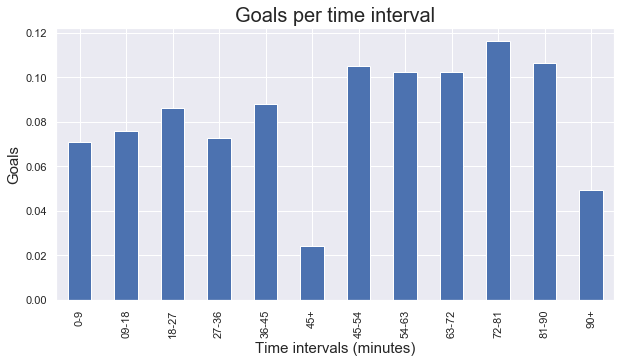

In [143]:
# here comes the barplot with the absolute frequency of goals in all the time slots

fig = plt.figure(1, figsize=(10, 5))
df_goals_PL['time_interval'].value_counts(normalize=True).sort_index().plot(kind='bar')
plt.title('Goals per time interval',size=20)
plt.xlabel('Time intervals (minutes)',size=15)
plt.ylabel('Goals',size=15)
plt.show()

#### ii) Find the top 10 teams that score the most in the interval "81-90"

In [144]:
# we merge our goals df with the teams df

df_goals_teams_PL = pd.merge(df_teams_PL,df_goals_PL, left_on='wyId', right_on='teamId')
df_goals_teams_PL

,city,name,wyId,officialName,area,type,eventId,subEventName,tags,playerId,...,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,attempt_status,event_time_minutes,time_interval
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",3327,...,2499745,Shot,1613,1H,2106.291869,100,182168996,goal,35.10,27-36
1,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",8004,...,2499745,Shot,1613,2H,1613.899075,100,182169697,goal,71.90,63-72
2,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,10,Shot,"[{'id': 101}, {'id': 401}, {'id': 201}, {'id':...",128214,...,2499745,Shot,1613,2H,2453.135608,100,182169860,goal,85.89,81-90
3,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",8833,...,2499757,Shot,1613,2H,1843.448341,100,186196932,goal,75.72,72-81
4,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,10,Shot,"[{'id': 101}, {'id': 401}, {'id': 201}, {'id':...",70215,...,2499765,Shot,1613,1H,1122.869905,100,187995955,goal,18.71,18-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,London,Arsenal,1609,Arsenal FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,10,Shot,"[{'id': 101}, {'id': 401}, {'id': 201}, {'id':...",25413,...,2500080,Shot,1609,1H,2824.007110,100,249955373,goal,47.07,45+
984,London,Arsenal,1609,Arsenal FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,10,Shot,"[{'id': 101}, {'id': 401}, {'id': 201}, {'id':...",14869,...,2500080,Shot,1609,2H,482.384038,100,249955489,goal,53.04,45-54
985,London,Arsenal,1609,Arsenal FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,10,Shot,"[{'id': 101}, {'id': 401}, {'id': 201}, {'id':...",230020,...,2500080,Shot,1609,2H,1096.635788,100,249955583,goal,63.28,63-72
986,London,Arsenal,1609,Arsenal FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25867,...,2500080,Shot,1609,2H,1742.183211,100,249955677,goal,74.04,72-81


In [145]:
# we only keep goals from the 81-90 time interval

df_goals_81_90_PL = df_goals_teams_PL[df_goals_teams_PL['time_interval'] == '81-90']

In [146]:
# first way to get a ranking

df_goals_81_90_PL['name'].value_counts()

Manchester City           13
Arsenal                   11
Manchester United          9
Chelsea                    9
Liverpool                  7
Crystal Palace             7
Watford                    7
West Ham United            6
Tottenham Hotspur          5
AFC Bournemouth            5
Burnley                    4
Southampton                4
Leicester City             3
West Bromwich Albion       3
Everton                    3
Swansea City               3
Brighton & Hove Albion     2
Newcastle United           2
Stoke City                 1
Huddersfield Town          1
Name: name, dtype: int64

In [147]:
list_teams_goals_81_90_PL = df_goals_81_90_PL['name'].tolist()
list_teams_goals_81_90_PL = sorted(list(dict.fromkeys(list_teams_goals_81_90_PL))) #deduplicate and sort

In [148]:
# we count goals for each team

goals_81_90_list = []


for team in list_teams_goals_81_90_PL:
    goals = 0
    for index,row in df_goals_81_90_PL.iterrows():
        if row['name'] == team:
            goals += 1

    goals_81_90_list.append(goals)

In [149]:
goals_81_90_list

[5, 11, 2, 4, 9, 7, 3, 1, 3, 7, 13, 9, 2, 4, 1, 3, 5, 7, 3, 6]

In [150]:
# we merge team names and goals

df_crq1_2 = pd.DataFrame(list(zip(list_teams_goals_81_90_PL, goals_81_90_list)), columns = ['name', 'goals'])

In [151]:
# and here is our top10!

df_crq1_2.sort_values(by=['goals'],ascending=False).head(n=10).reset_index(drop=True)

,name,goals
0,Manchester City,13
1,Arsenal,11
2,Manchester United,9
3,Chelsea,9
4,Liverpool,7
5,Watford,7
6,Crystal Palace,7
7,West Ham United,6
8,Tottenham Hotspur,5
9,AFC Bournemouth,5


#### iii) Show if there are players that were able to score at least one goal in 8 different intervals

In [152]:
df_players_PL

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",91,Toby,,Alderweireld,1624,1989-03-02,187,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Belgium', 'id': '56', 'alpha3code': ...",36,right,T. Alderweireld,5629
1,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",88,Jan,,Vertonghen,1624,1987-04-24,189,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Belgium', 'id': '56', 'alpha3code': ...",48,left,J. Vertonghen,5629
2,"{'name': 'Denmark', 'id': '208', 'alpha3code':...",76,Christian,,Dannemann Eriksen,1624,1992-02-14,180,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Denmark', 'id': '208', 'alpha3code':...",54,right,C. Eriksen,7712
3,"{'name': 'Iceland', 'id': '352', 'alpha3code':...",77,Johann,,Berg Guðmunds­son,1646,1990-10-27,186,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Iceland', 'id': '352', 'alpha3code':...",93,left,J. Guðmunds­son,7839
4,"{'name': 'Morocco', 'id': '504', 'alpha3code':...",80,Nacer,,Chadli,1627,1989-08-02,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Belgium', 'id': '56', 'alpha3code': ...",261,right,N. Chadli,5629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,"{'name': 'Spain', 'id': 724, 'alpha3code': 'ES...",69,Juan Marcos,,Foyth,1624,1998-01-12,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Argentina', 'id': 32, 'alpha3code': ...",456053,right,J. Foyth,12274
438,"{'name': 'Congo DR', 'id': 180, 'alpha3code': ...",72,Aaron,,Wan-Bissaka,1628,1997-11-26,183,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'England', 'id': 0, 'alpha3code': 'XE...",486252,right,A. Wan-Bissaka,2421
439,"{'name': 'Wales', 'id': 0, 'alpha3code': 'XWA'...",60,Jonathan,,Williams,1628,1993-10-09,168,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'England', 'id': 0, 'alpha3code': 'XE...",8421,right,J. Williams,null
440,"{'name': 'Ecuador', 'id': 218, 'alpha3code': '...",64,Jefferson Antonio,,Montero Vite,10531,1989-09-01,169,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Ecuador', 'id': 218, 'alpha3code': '...",3599,right,J. Montero,null


In [153]:
df_goals_PL

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,attempt_status,event_time_minutes,time_interval
46,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,94.595788,100,177959212,goal,1.58,0-9
91,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",14763,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,254.745027,100,177959280,goal,4.25,0-9
554,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",12829,"[{'y': 54, 'x': 94}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,1710.855093,100,177959759,goal,28.51,27-36
898,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",7945,"[{'y': 50, 'x': 92}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,2815.900791,100,177960130,goal,46.93,45+
1107,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",12829,"[{'y': 54, 'x': 92}, {'y': 100, 'x': 100}]",2499719,Shot,1631,2H,634.312236,100,177960379,goal,55.57,54-63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641382,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",8717,"[{'y': 36, 'x': 86}, {'y': 0, 'x': 0}]",2500097,Shot,1624,2H,1837.598666,100,251621477,goal,75.63,72-81
642258,10,Shot,"[{'id': 101}, {'id': 401}, {'id': 201}, {'id':...",41174,"[{'y': 45, 'x': 77}, {'y': 0, 'x': 0}]",2500098,Shot,1633,1H,2287.135376,100,251595394,goal,38.12,36-45
642748,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",14703,"[{'y': 64, 'x': 74}, {'y': 0, 'x': 0}]",2500098,Shot,1633,2H,1075.868975,100,251595849,goal,62.93,54-63
642888,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",145692,"[{'y': 55, 'x': 97}, {'y': 100, 'x': 100}]",2500098,Shot,1623,2H,1737.064842,100,251596263,goal,73.95,72-81


In [154]:
# we merge goals df and players df, to attribute each goal to a player

df_goals_players_PL = pd.merge(df_players_PL,df_goals_PL, left_on='wyId', right_on='playerId')
df_goals_players_PL

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,...,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,attempt_status,event_time_minutes,time_interval
0,"{'name': 'Denmark', 'id': '208', 'alpha3code':...",76,Christian,,Dannemann Eriksen,1624,1992-02-14,180,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Denmark', 'id': '208', 'alpha3code':...",...,2499752,Shot,1624,1H,2478.424573,100,185820356,goal,41.31,36-45
1,"{'name': 'Denmark', 'id': '208', 'alpha3code':...",76,Christian,,Dannemann Eriksen,1624,1992-02-14,180,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Denmark', 'id': '208', 'alpha3code':...",...,2499778,Shot,1624,2H,868.014789,100,189938706,goal,59.47,54-63
2,"{'name': 'Denmark', 'id': '208', 'alpha3code':...",76,Christian,,Dannemann Eriksen,1624,1992-02-14,180,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Denmark', 'id': '208', 'alpha3code':...",...,2499797,Shot,1624,2H,100.548278,100,196336835,goal,46.68,45-54
3,"{'name': 'Denmark', 'id': '208', 'alpha3code':...",76,Christian,,Dannemann Eriksen,1624,1992-02-14,180,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Denmark', 'id': '208', 'alpha3code':...",...,2499877,Shot,1624,2H,1734.483033,100,213058897,goal,73.91,72-81
4,"{'name': 'Denmark', 'id': '208', 'alpha3code':...",76,Christian,,Dannemann Eriksen,1624,1992-02-14,180,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Denmark', 'id': '208', 'alpha3code':...",...,2499895,Shot,1624,2H,2826.582836,100,215110118,goal,92.11,90+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,"{'name': 'England', 'id': 0, 'alpha3code': 'XE...",74,Dominic,,Calvert-Lewin,1623,1997-03-16,176,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...","{'name': 'England', 'id': 0, 'alpha3code': 'XE...",...,2499970,Shot,1623,2H,1125.402804,100,225785141,goal,63.76,63-72
915,"{'name': 'England', 'id': 0, 'alpha3code': 'XE...",67,Jacob,,Murphy,1613,1995-02-24,173,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'England', 'id': 0, 'alpha3code': 'XE...",...,2499954,Shot,1613,2H,1267.725276,100,222269113,goal,66.13,63-72
916,"{'name': 'England', 'id': 0, 'alpha3code': 'XE...",78,Tom,,Davies,1623,1998-06-30,180,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'England', 'id': 0, 'alpha3code': 'XE...",...,2499980,Shot,1623,2H,1798.985073,100,227322723,goal,74.98,72-81
917,"{'name': 'England', 'id': 0, 'alpha3code': 'XE...",78,Tom,,Davies,1623,1998-06-30,180,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'England', 'id': 0, 'alpha3code': 'XE...",...,2500083,Shot,1623,2H,3003.896751,100,249269589,goal,95.06,90+


In [155]:
# we do a crosstab to get the number of goals for every time intervals for each player

players_intervals_PF = pd.crosstab(df_goals_players_PL['shortName'],df_goals_players_PL['time_interval'])
players_intervals_PF

time_interval,0-9,09-18,18-27,27-36,36-45,45+,45-54,54-63,63-72,72-81,81-90,90+
shortName,,,,,,,,,,,,
A. Barnes,1,0,1,0,1,0,0,2,3,0,1,0
A. Carroll,0,0,0,0,0,0,0,1,0,0,1,1
A. Cresswell,0,0,0,0,1,0,0,0,0,0,0,0
A. Doucouré,0,0,0,1,2,1,0,0,1,0,2,0
A. Gray,0,1,0,1,0,0,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
W. Zaha,1,1,1,1,2,0,0,0,1,1,0,1
Willian,1,0,1,1,1,0,0,0,0,1,1,0
X. Shaqiri,1,0,0,1,3,0,1,1,1,0,0,0


In [156]:
# for each player, we count the number of intervals he has scored in

intervals_nbr_list = []

for index, row in players_intervals_PF.iterrows():
    nbr_intervals = 0
    for i in range(0, len(players_intervals_PF.columns)):
        if row[players_intervals_PF.columns[i]] > 0:
            nbr_intervals += 1
    intervals_nbr_list.append(nbr_intervals)

In [157]:
intervals_nbr_list

[6,
 3,
 1,
 5,
 4,
 3,
 3,
 3,
 8,
 7,
 4,
 1,
 3,
 1,
 5,
 1,
 2,
 1,
 2,
 6,
 2,
 1,
 1,
 1,
 2,
 4,
 2,
 2,
 2,
 3,
 2,
 6,
 2,
 6,
 2,
 2,
 1,
 2,
 7,
 2,
 2,
 4,
 5,
 7,
 6,
 7,
 3,
 1,
 1,
 4,
 2,
 3,
 1,
 3,
 2,
 1,
 2,
 5,
 1,
 3,
 1,
 6,
 1,
 1,
 1,
 7,
 1,
 2,
 1,
 1,
 4,
 1,
 2,
 1,
 7,
 3,
 1,
 1,
 9,
 11,
 2,
 3,
 2,
 2,
 1,
 2,
 5,
 1,
 2,
 4,
 2,
 1,
 1,
 2,
 4,
 1,
 3,
 7,
 2,
 7,
 2,
 1,
 1,
 4,
 1,
 1,
 1,
 6,
 1,
 4,
 2,
 3,
 11,
 3,
 1,
 3,
 3,
 4,
 3,
 1,
 1,
 2,
 1,
 2,
 4,
 1,
 1,
 1,
 7,
 2,
 1,
 7,
 2,
 3,
 8,
 1,
 2,
 3,
 4,
 4,
 3,
 1,
 3,
 2,
 6,
 2,
 1,
 1,
 2,
 1,
 4,
 5,
 11,
 2,
 1,
 1,
 1,
 3,
 1,
 5,
 4,
 6,
 1,
 7,
 3,
 5,
 4,
 3,
 4,
 1,
 1,
 4,
 2,
 9,
 9,
 4,
 1,
 11,
 3,
 2,
 5,
 8,
 7,
 2,
 3,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 7,
 1,
 7,
 3,
 1,
 5,
 5,
 4,
 1,
 6,
 2,
 1,
 1,
 2,
 3,
 2,
 3,
 1,
 3,
 1,
 3,
 2,
 2,
 8,
 6,
 6,
 9,
 4]

In [158]:
players_intervals_PF['total_intervals'] = intervals_nbr_list

In [159]:
# we only keep players with at least 8 intervals

df_crq1_3 = players_intervals_PF[players_intervals_PF['total_intervals'] >= 8]

In [160]:
# and here are our players with goals in at least 8 different time slots!

df_crq1_3.sort_values(by=['total_intervals'],ascending=False)

time_interval,0-9,09-18,18-27,27-36,36-45,45+,45-54,54-63,63-72,72-81,81-90,90+,total_intervals
shortName,,,,,,,,,,,,,
H. Kane,4,1,2,2,2,0,7,2,3,4,1,1,11
J. Vardy,2,3,3,1,1,0,1,2,3,2,1,1,11
Mohamed Salah,2,1,3,2,6,0,3,2,4,5,3,1,11
R. Sterling,2,1,1,1,1,0,2,1,2,1,4,2,11
Gabriel Jesus,0,2,2,0,2,1,2,1,0,1,1,1,9
R. Lukaku,1,0,3,1,1,0,1,2,3,2,2,0,9
R. Mahrez,0,2,1,0,1,1,1,2,0,1,1,2,9
Álvaro Morata,1,1,0,2,2,0,1,1,1,1,1,0,9
A. Lacazette,2,1,3,0,0,1,1,0,2,1,3,0,8


## CRQ2) Visualize movements and passes on the pitch!

#### 1) Considering only the match Barcelona - Real Madrid played on the 6 May 2018

In [161]:
import matplotlib

#here is our function that will draw the pitch

def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = plt.Rectangle([0,0], width = 120, height = 80, fill = False,color="black")
    #Left, Right Penalty Area and midline
    LeftPenalty = plt.Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False,color="black")
    RightPenalty = plt.Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False,color="black")
    midline = matplotlib.patches.ConnectionPatch([60,0], [60,80], "data", "data",color="black")

    #Left, Right 6-yard Box
    LeftSixYard = plt.Rectangle([0,32], width = 4.9, height = 16, fill = False,color="black")
    RightSixYard = plt.Rectangle([115.1,32], width = 4.9, height = 16, fill = False,color="black")


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = matplotlib.patches.Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = matplotlib.patches.Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

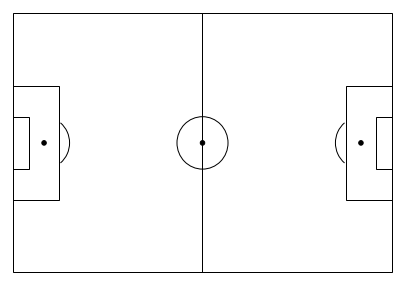

In [162]:
#Let's try to draw a full football pitch

fig=plt.figure() #set up the figures
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')
plt.show()

In [163]:
#Let's import La Liga matches data

df_matches_Liga =  pd.read_json('matches_Spain.json',encoding='utf-8')
df_matches_Liga

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4406122,38,"{'676': {'scoreET': 0, 'coachId': 92894, 'side...",181144,2018-05-20 18:45:00,676,Camp Nou,2565922,"Barcelona - Real Sociedad, 1 - 0","May 20, 2018 at 8:45:00 PM GMT+2","[{'refereeId': 398931, 'role': 'referee'}, {'r...",Regular,795
1,Played,4406122,38,"{'679': {'scoreET': 0, 'coachId': 3427, 'side'...",181144,2018-05-20 16:30:00,0,Estadio Wanda Metropolitano,2565925,"Atlético Madrid - Eibar, 2 - 2","May 20, 2018 at 6:30:00 PM GMT+2","[{'refereeId': 395056, 'role': 'referee'}, {'r...",Regular,795
2,Played,4406122,38,"{'691': {'scoreET': 0, 'coachId': 444778, 'sid...",181144,2018-05-20 14:15:00,691,San Mamés Barria,2565919,"Athletic Club - Espanyol, 0 - 1","May 20, 2018 at 4:15:00 PM GMT+2","[{'refereeId': 384957, 'role': 'referee'}, {'r...",Regular,795
3,Played,4406122,38,"{'674': {'scoreET': 0, 'coachId': 210074, 'sid...",181144,2018-05-20 10:00:00,674,Estadio de Mestalla,2565924,"Valencia - Deportivo La Coruña, 2 - 1","May 20, 2018 at 12:00:00 PM GMT+2","[{'refereeId': 398913, 'role': 'referee'}, {'r...",Regular,795
4,Played,4406122,38,"{'675': {'scoreET': 0, 'coachId': 275283, 'sid...",181144,2018-05-19 18:45:00,0,Estadio de la Cerámica,2565927,"Villarreal - Real Madrid, 2 - 2","May 19, 2018 at 8:45:00 PM GMT+2","[{'refereeId': 395085, 'role': 'referee'}, {'r...",Regular,795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Played,4406122,1,"{'691': {'scoreET': 0, 'coachId': 169425, 'sid...",181144,2017-08-19 20:15:00,0,Estadio Ramón Sánchez Pizjuán,2565552,"Sevilla - Espanyol, 1 - 1","August 19, 2017 at 10:15:00 PM GMT+2","[{'refereeId': 378950, 'role': 'referee'}, {'r...",Regular,795
376,Played,4406122,1,"{'756': {'scoreET': 0, 'coachId': 167044, 'sid...",181144,2017-08-19 18:15:00,0,Estadi Municipal de Montilivi,2565551,"Girona - Atlético Madrid, 2 - 2","August 19, 2017 at 8:15:00 PM GMT+2","[{'refereeId': 378994, 'role': 'referee'}, {'r...",Regular,795
377,Played,4406122,1,"{'692': {'scoreET': 0, 'coachId': 3880, 'side'...",181144,2017-08-19 16:15:00,687,Estadio de Balaídos,2565549,"Celta de Vigo - Real Sociedad, 2 - 3","August 19, 2017 at 6:15:00 PM GMT+2","[{'refereeId': 384946, 'role': 'referee'}, {'r...",Regular,795
378,Played,4406122,1,"{'674': {'scoreET': 0, 'coachId': 210074, 'sid...",181144,2017-08-18 20:15:00,674,Estadio de Mestalla,2565556,"Valencia - Las Palmas, 1 - 0","August 18, 2017 at 10:15:00 PM GMT+2","[{'refereeId': 381927, 'role': 'referee'}, {'r...",Regular,795


In [164]:
#by looking at the data we find the id of the Clasico game we are interested in

df_classico = df_matches_Liga[df_matches_Liga['wyId'] == 2565907]
df_classico

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
23,Played,4406122,36,"{'675': {'scoreET': 0, 'coachId': 275283, 'sid...",181144,2018-05-06 18:45:00,0,Camp Nou,2565907,"Barcelona - Real Madrid, 2 - 2","May 6, 2018 at 8:45:00 PM GMT+2","[{'refereeId': 378950, 'role': 'referee'}, {'r...",Regular,795


In [165]:
#Let's import La Liga events data

df_events_Liga =  pd.read_json('events_Spain.json',encoding='utf-8')
df_events_Liga

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],3542,"[{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]",2565548,Pass,682,1H,2.994582,85,180864419
1,8,Simple pass,[{'id': 1801}],274435,"[{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]",2565548,Pass,682,1H,3.137020,85,180864418
2,8,Simple pass,[{'id': 1801}],364860,"[{'y': 30, 'x': 45}, {'y': 12, 'x': 38}]",2565548,Pass,682,1H,6.709668,85,180864420
3,8,Simple pass,[{'id': 1801}],3534,"[{'y': 12, 'x': 38}, {'y': 69, 'x': 32}]",2565548,Pass,682,1H,8.805497,85,180864421
4,8,Simple pass,[{'id': 1801}],3695,"[{'y': 69, 'x': 32}, {'y': 37, 'x': 31}]",2565548,Pass,682,1H,14.047492,85,180864422
...,...,...,...,...,...,...,...,...,...,...,...,...
628654,8,Simple pass,[{'id': 1801}],20623,"[{'y': 25, 'x': 66}, {'y': 2, 'x': 88}]",2565927,Pass,682,2H,2939.077491,85,253302671
628655,7,Acceleration,[{'id': 1801}],122832,"[{'y': 2, 'x': 88}, {'y': 21, 'x': 97}]",2565927,Others on the ball,682,2H,2940.515560,70,253302673
628656,8,Cross,"[{'id': 401}, {'id': 1802}]",122832,"[{'y': 21, 'x': 97}, {'y': 26, 'x': 92}]",2565927,Pass,682,2H,2942.098761,80,253302674
628657,8,Simple pass,[{'id': 1801}],40756,"[{'y': 74, 'x': 8}, {'y': 56, 'x': 9}]",2565927,Pass,675,2H,2943.089232,85,253302698


In [166]:
#we only keep the events that happened during El Clasico

df_events_classico = df_events_Liga[df_events_Liga['matchId'] == 2565907]
df_events_classico

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
593455,8,Simple pass,[{'id': 1801}],3321,"[{'y': 49, 'x': 50}, {'y': 40, 'x': 37}]",2565907,Pass,675,1H,3.274992,85,249644096
593456,8,Simple pass,[{'id': 1801}],14723,"[{'y': 40, 'x': 37}, {'y': 23, 'x': 30}]",2565907,Pass,675,1H,5.109197,85,249644097
593457,8,Simple pass,[{'id': 1801}],3306,"[{'y': 23, 'x': 30}, {'y': 57, 'x': 26}]",2565907,Pass,675,1H,7.109958,85,249644098
593458,8,Simple pass,[{'id': 1801}],3309,"[{'y': 57, 'x': 26}, {'y': 40, 'x': 8}]",2565907,Pass,675,1H,8.912297,85,249644099
593459,8,Simple pass,[{'id': 1801}],3915,"[{'y': 40, 'x': 8}, {'y': 14, 'x': 11}]",2565907,Pass,675,1H,11.290220,85,249644100
...,...,...,...,...,...,...,...,...,...,...,...,...
595243,3,Corner,"[{'id': 801}, {'id': 1801}]",4498,"[{'y': 100, 'x': 100}, {'y': 51, 'x': 88}]",2565907,Free Kick,675,2H,2982.539784,30,249646064
595244,1,Ground loose ball duel,"[{'id': 701}, {'id': 1802}]",3306,"[{'y': 51, 'x': 88}, {'y': 60, 'x': 88}]",2565907,Duel,675,2H,2983.141976,13,249646065
595245,1,Ground loose ball duel,"[{'id': 703}, {'id': 1801}]",3476,"[{'y': 49, 'x': 12}, {'y': 40, 'x': 12}]",2565907,Duel,676,2H,2983.907855,13,249646246
595246,2,Foul,[],3306,"[{'y': 60, 'x': 88}, {'y': 51, 'x': 88}]",2565907,Foul,675,2H,2984.949321,20,249646066


In [167]:
df_players

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,,Mandanda,3772,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,,O. Mandanda,null
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,,Konaté,2975,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konaté,null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3598,"{'name': 'Tunisia', 'id': 788, 'alpha3code': '...",72,Ali,,Maâloul,16041,1990-01-01,175,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Tunisia', 'id': 788, 'alpha3code': '...",120839,left,A. Maâloul,null
3599,"{'name': 'Peru', 'id': 604, 'alpha3code': 'PER...",76,Carlos Alberto,,Cáceda Oyaguez,15591,1991-09-27,183,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Peru', 'id': 604, 'alpha3code': 'PER...",114736,right,C. Cáceda,null
3600,"{'name': 'Peru', 'id': 604, 'alpha3code': 'PER...",78,Miguel Gianpierre,,Araujo Blanco,12072,1994-10-24,179,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Peru', 'id': 604, 'alpha3code': 'PER...",114908,right,M. Araujo,null
3601,"{'name': 'Morocco', 'id': 504, 'alpha3code': '...",70,Ahmed Reda,,Tagnaouti,16183,1996-04-05,182,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Morocco', 'id': 504, 'alpha3code': '...",285583,right,A. Tagnaouti,null


In [168]:
#we find Cristiano Ronaldo's id

cr7 = df_players[df_players['shortName'] == 'Cristiano Ronaldo']
cr7

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
185,"{'name': 'Portugal', 'id': '620', 'alpha3code'...",83,Cristiano Ronaldo,,dos Santos Aveiro,3159,1985-02-05,187,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...","{'name': 'Portugal', 'id': '620', 'alpha3code'...",3322,right,Cristiano Ronaldo,9905


In [169]:
#we find Messi's id

messi = df_players[df_players['shortName'] == 'L. Messi']
messi

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
207,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",72,Lionel Andrés,,Messi Cuccittini,676,1987-06-24,170,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...","{'name': 'Argentina', 'id': '32', 'alpha3code'...",3359,left,L. Messi,12274


In [170]:
# we store Cristiano Ronaldo's events

df_events_CR7 = df_events_classico[df_events_classico['playerId'] == 3322]
df_events_CR7

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
593473,1,Ground loose ball duel,"[{'id': 702}, {'id': 1801}]",3322,"[{'y': 19, 'x': 49}, {'y': 17, 'x': 49}]",2565907,Duel,675,1H,68.618689,13,249644112
593475,1,Air duel,"[{'id': 701}, {'id': 1802}]",3322,"[{'y': 17, 'x': 49}, {'y': 19, 'x': 38}]",2565907,Duel,675,1H,69.411334,10,249644113
593497,1,Ground defending duel,"[{'id': 701}, {'id': 1802}]",3322,"[{'y': 13, 'x': 65}, {'y': 23, 'x': 53}]",2565907,Duel,675,1H,114.548692,12,249644119
593552,1,Ground attacking duel,"[{'id': 502}, {'id': 703}, {'id': 1801}]",3322,"[{'y': 12, 'x': 93}, {'y': 8, 'x': 97}]",2565907,Duel,675,1H,275.327960,11,249644145
593554,8,Cross,"[{'id': 401}, {'id': 801}, {'id': 1802}]",3322,"[{'y': 8, 'x': 97}, {'y': 100, 'x': 100}]",2565907,Pass,675,1H,277.578035,80,249644146
593568,6,,[],3322,"[{'y': 7, 'x': 76}, {'y': 100, 'x': 100}]",2565907,Offside,675,1H,311.223309,,249644157
593600,1,Ground attacking duel,"[{'id': 502}, {'id': 703}, {'id': 1801}]",3322,"[{'y': 57, 'x': 46}, {'y': 36, 'x': 42}]",2565907,Duel,675,1H,403.870069,11,249644178
593601,8,Simple pass,[{'id': 1801}],3322,"[{'y': 36, 'x': 42}, {'y': 28, 'x': 42}]",2565907,Pass,675,1H,406.937034,85,249644179
593605,1,Ground attacking duel,"[{'id': 501}, {'id': 703}, {'id': 1801}]",3322,"[{'y': 14, 'x': 91}, {'y': 14, 'x': 88}]",2565907,Duel,675,1H,418.749555,11,249644184
593607,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1203}, {'id'...",3322,"[{'y': 14, 'x': 88}, {'y': 100, 'x': 100}]",2565907,Shot,675,1H,419.789814,100,249644185


In [171]:
# we store Messi's events

df_events_messi = df_events_classico[df_events_classico['playerId'] == 3359]
df_events_messi

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
593485,8,Simple pass,[{'id': 1801}],3359,"[{'y': 87, 'x': 74}, {'y': 91, 'x': 80}]",2565907,Pass,676,1H,85.701277,85,249644574
593489,8,Simple pass,[{'id': 1801}],3359,"[{'y': 87, 'x': 67}, {'y': 71, 'x': 43}]",2565907,Pass,676,1H,92.114223,85,249644578
593499,8,Simple pass,[{'id': 1801}],3359,"[{'y': 66, 'x': 58}, {'y': 78, 'x': 75}]",2565907,Pass,676,1H,117.241765,85,249644587
593501,1,Ground attacking duel,"[{'id': 702}, {'id': 1801}]",3359,"[{'y': 67, 'x': 65}, {'y': 38, 'x': 63}]",2565907,Duel,676,1H,122.168204,11,249644589
593503,8,Simple pass,[{'id': 1801}],3359,"[{'y': 38, 'x': 63}, {'y': 43, 'x': 69}]",2565907,Pass,676,1H,124.686582,85,249644590
...,...,...,...,...,...,...,...,...,...,...,...,...
595055,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1206}, {'id'...",3359,"[{'y': 72, 'x': 96}, {'y': 0, 'x': 0}]",2565907,Shot,676,2H,2199.766741,100,249646166
595106,1,Ground attacking duel,"[{'id': 602}, {'id': 702}, {'id': 1801}]",3359,"[{'y': 83, 'x': 44}, {'y': 93, 'x': 36}]",2565907,Duel,676,2H,2411.569686,11,249646184
595116,7,Touch,[{'id': 1401}],3359,"[{'y': 43, 'x': 39}, {'y': 10, 'x': 35}]",2565907,Others on the ball,676,2H,2421.085231,72,249646190
595131,8,Launch,[{'id': 1802}],3359,"[{'y': 8, 'x': 44}, {'y': 42, 'x': 63}]",2565907,Pass,676,2H,2558.961654,84,249646196


In [172]:
# we only keep relevant events for both players
relevant_events = ['Duel', 'Pass', 'Shot', 'Free Kick']

df_events_CR7 = df_events_CR7[df_events_CR7['eventName'].isin(relevant_events)]
df_events_messi = df_events_messi[df_events_messi['eventName'].isin(relevant_events)]

In [173]:
# we get starting and ending positions for all events using the powerful re library

y_start = []
x_start = []
y_end = []
x_end = []

for index,row in df_events_CR7.iterrows():
    int_list = [int(s) for s in re.findall(r'\b\d+\b', str(row['positions']))]
    y_start.append(0.8*int_list[0])
    x_start.append(120-1.2*int_list[1])
    y_end.append(0.8*int_list[2])
    x_end.append(120-1.2*int_list[3])

In [174]:
df_events_CR7['y_start'] = y_start
df_events_CR7['x_start'] = x_start
df_events_CR7['y_end'] = y_end
df_events_CR7['x_end'] = x_end

C:\Users\Nathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Nathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Nathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [175]:
df_events_CR7

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,y_start,x_start,y_end,x_end
593473,1,Ground loose ball duel,"[{'id': 702}, {'id': 1801}]",3322,"[{'y': 19, 'x': 49}, {'y': 17, 'x': 49}]",2565907,Duel,675,1H,68.618689,13,249644112,15.2,61.2,13.6,61.2
593475,1,Air duel,"[{'id': 701}, {'id': 1802}]",3322,"[{'y': 17, 'x': 49}, {'y': 19, 'x': 38}]",2565907,Duel,675,1H,69.411334,10,249644113,13.6,61.2,15.2,74.4
593497,1,Ground defending duel,"[{'id': 701}, {'id': 1802}]",3322,"[{'y': 13, 'x': 65}, {'y': 23, 'x': 53}]",2565907,Duel,675,1H,114.548692,12,249644119,10.4,42.0,18.4,56.4
593552,1,Ground attacking duel,"[{'id': 502}, {'id': 703}, {'id': 1801}]",3322,"[{'y': 12, 'x': 93}, {'y': 8, 'x': 97}]",2565907,Duel,675,1H,275.327960,11,249644145,9.6,8.4,6.4,3.6
593554,8,Cross,"[{'id': 401}, {'id': 801}, {'id': 1802}]",3322,"[{'y': 8, 'x': 97}, {'y': 100, 'x': 100}]",2565907,Pass,675,1H,277.578035,80,249644146,6.4,3.6,80.0,0.0
593600,1,Ground attacking duel,"[{'id': 502}, {'id': 703}, {'id': 1801}]",3322,"[{'y': 57, 'x': 46}, {'y': 36, 'x': 42}]",2565907,Duel,675,1H,403.870069,11,249644178,45.6,64.8,28.8,69.6
593601,8,Simple pass,[{'id': 1801}],3322,"[{'y': 36, 'x': 42}, {'y': 28, 'x': 42}]",2565907,Pass,675,1H,406.937034,85,249644179,28.8,69.6,22.4,69.6
593605,1,Ground attacking duel,"[{'id': 501}, {'id': 703}, {'id': 1801}]",3322,"[{'y': 14, 'x': 91}, {'y': 14, 'x': 88}]",2565907,Duel,675,1H,418.749555,11,249644184,11.2,10.8,11.2,14.4
593607,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1203}, {'id'...",3322,"[{'y': 14, 'x': 88}, {'y': 100, 'x': 100}]",2565907,Shot,675,1H,419.789814,100,249644185,11.2,14.4,80.0,0.0
593628,1,Air duel,"[{'id': 701}, {'id': 1802}]",3322,"[{'y': 51, 'x': 93}, {'y': 31, 'x': 90}]",2565907,Duel,675,1H,476.363494,10,249644199,40.8,8.4,24.8,12.0


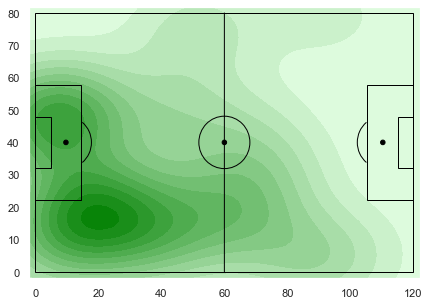

In [176]:
#CR7 heatmap

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
#ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('on')


x_coord = df_events_CR7['x_start'].tolist()
y_coord = df_events_CR7['y_start'].tolist()

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more blurry it looks
sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 15)
plt.show()

In [177]:
# we get starting and ending positions for all events using the powerful re library

y_start = []
x_start = []
y_end = []
x_end = []

for index,row in df_events_messi.iterrows():
    int_list = [int(s) for s in re.findall(r'\b\d+\b', str(row['positions']))]
    y_start.append(0.8*int_list[0])
    x_start.append(120-1.2*int_list[1])
    y_end.append(0.8*int_list[2])
    x_end.append(120-1.2*int_list[3])

In [178]:
df_events_messi['y_start'] = y_start
df_events_messi['x_start'] = x_start
df_events_messi['y_end'] = y_end
df_events_messi['x_end'] = x_end

C:\Users\Nathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Nathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Nathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

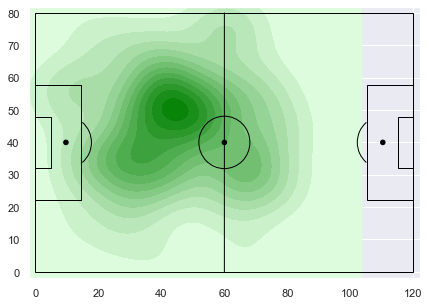

In [179]:
#Messi heatmap

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
#ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('on')


x_coord = df_events_messi['x_start'].tolist()
y_coord = df_events_messi['y_start'].tolist()

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more blurry it looks
sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 15)
plt.show()

#### 2) Considering only the match Juventus - Napoli played on the 22 April 2018

In [180]:
df_matches_SerieA =  pd.read_json('matches_Italy.json',encoding='utf-8')
df_matches_SerieA.head(n=50)

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4406278,38,"{'3162': {'scoreET': 0, 'coachId': 251025, 'si...",181248,2018-05-20 18:45:00,3161,,2576335,"Lazio - Internazionale, 2 - 3","May 20, 2018 at 8:45:00 PM GMT+2","[{'refereeId': 377206, 'role': 'referee'}, {'r...",Regular,524
1,Played,4406278,38,"{'3158': {'scoreET': 0, 'coachId': 210119, 'si...",181248,2018-05-20 18:45:00,3158,MAPEI Stadium - Città del Tricolore,2576336,"Sassuolo - Roma, 0 - 1","May 20, 2018 at 8:45:00 PM GMT+2","[{'refereeId': 377255, 'role': 'referee'}, {'r...",Regular,524
2,Played,4406278,38,"{'3173': {'scoreET': 0, 'coachId': 251044, 'si...",181248,2018-05-20 16:00:00,3173,,2576329,"Cagliari - Atalanta, 1 - 0","May 20, 2018 at 6:00:00 PM GMT+2","[{'refereeId': 377247, 'role': 'referee'}, {'r...",Regular,524
3,Played,4406278,38,"{'3165': {'scoreET': 0, 'coachId': 272970, 'si...",181248,2018-05-20 16:00:00,3165,,2576330,"Chievo - Benevento, 1 - 0","May 20, 2018 at 6:00:00 PM GMT+2","[{'refereeId': 377246, 'role': 'referee'}, {'r...",Regular,524
4,Played,4406278,38,"{'3166': {'scoreET': 0, 'coachId': 20481, 'sid...",181248,2018-05-20 16:00:00,3163,,2576331,"Udinese - Bologna, 1 - 0","May 20, 2018 at 6:00:00 PM GMT+2","[{'refereeId': 377254, 'role': 'referee'}, {'r...",Regular,524
5,Played,4406278,38,"{'3197': {'scoreET': 0, 'coachId': 287082, 'si...",181248,2018-05-20 16:00:00,3187,,2576332,"Napoli - Crotone, 2 - 1","May 20, 2018 at 6:00:00 PM GMT+2","[{'refereeId': 377231, 'role': 'referee'}, {'r...",Regular,524
6,Played,4406278,38,"{'3157': {'scoreET': 0, 'coachId': 20407, 'sid...",181248,2018-05-20 16:00:00,3157,,2576333,"Milan - Fiorentina, 5 - 1","May 20, 2018 at 6:00:00 PM GMT+2","[{'refereeId': 377252, 'role': 'referee'}, {'r...",Regular,524
7,Played,4406278,38,"{'3164': {'scoreET': 0, 'coachId': 210121, 'si...",181248,2018-05-20 16:00:00,3204,,2576337,"SPAL - Sampdoria, 3 - 1","May 20, 2018 at 6:00:00 PM GMT+2","[{'refereeId': 377256, 'role': 'referee'}, {'r...",Regular,524
8,Played,4406278,38,"{'3185': {'scoreET': 0, 'coachId': 21155, 'sid...",181248,2018-05-20 13:00:00,3185,,2576338,"Genoa - Torino, 1 - 2","May 20, 2018 at 3:00:00 PM GMT+2","[{'refereeId': 393614, 'role': 'referee'}, {'r...",Regular,524
9,Played,4406278,38,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",181248,2018-05-19 13:00:00,3159,,2576334,"Juventus - Hellas Verona, 2 - 1","May 19, 2018 at 3:00:00 PM GMT+2","[{'refereeId': 377237, 'role': 'referee'}, {'r...",Regular,524


In [181]:
#The Juve - Napoli game has ID 2576295

In [182]:
# Let's import our Serie A data

df_events_SerieA =  pd.read_json('events_Italy.json',encoding='utf-8')
df_events_SerieA

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],8327,"[{'y': 52, 'x': 49}, {'y': 44, 'x': 43}]",2575959,Pass,3158,1H,2.530536,85,180423957
1,8,Simple pass,[{'id': 1801}],20438,"[{'y': 44, 'x': 43}, {'y': 17, 'x': 36}]",2575959,Pass,3158,1H,3.768418,85,180423958
2,7,Touch,[],8306,"[{'y': 17, 'x': 36}, {'y': 56, 'x': 78}]",2575959,Others on the ball,3158,1H,4.868265,72,180423959
3,1,Ground attacking duel,"[{'id': 504}, {'id': 703}, {'id': 1801}]",8306,"[{'y': 56, 'x': 78}, {'y': 15, 'x': 64}]",2575959,Duel,3158,1H,8.114676,11,180423960
4,1,Ground attacking duel,"[{'id': 503}, {'id': 703}, {'id': 1801}]",8306,"[{'y': 15, 'x': 64}, {'y': 15, 'x': 72}]",2575959,Duel,3158,1H,8.647892,11,180423961
...,...,...,...,...,...,...,...,...,...,...,...,...
647367,3,Free kick cross,"[{'id': 801}, {'id': 1801}]",70974,"[{'y': 23, 'x': 75}, {'y': 65, 'x': 95}]",2576338,Free Kick,3193,2H,2870.982660,32,253567160
647368,1,Ground loose ball duel,"[{'id': 702}, {'id': 1801}]",14745,"[{'y': 35, 'x': 5}, {'y': 36, 'x': 3}]",2576338,Duel,3185,2H,2872.101142,13,253567161
647369,1,Ground loose ball duel,"[{'id': 702}, {'id': 1801}]",413041,"[{'y': 65, 'x': 95}, {'y': 64, 'x': 97}]",2576338,Duel,3193,2H,2872.990437,13,253567163
647370,1,Air duel,"[{'id': 703}, {'id': 1801}]",20927,"[{'y': 36, 'x': 3}, {'y': 100, 'x': 100}]",2576338,Duel,3185,2H,2874.049206,10,253567162


In [183]:
# we only keep events from the Juve - Napoli game we are interested in

df_events_juve_napoli = df_events_SerieA[df_events_SerieA['matchId'] == 2576295]
df_events_juve_napoli

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
573095,8,Simple pass,[{'id': 1801}],21385,"[{'y': 50, 'x': 50}, {'y': 53, 'x': 38}]",2576295,Pass,3187,1H,1.265726,85,245487374
573096,8,Simple pass,[{'id': 1801}],3300,"[{'y': 53, 'x': 38}, {'y': 52, 'x': 38}]",2576295,Pass,3187,1H,2.087491,85,245487375
573097,8,High pass,[{'id': 1802}],25726,"[{'y': 52, 'x': 38}, {'y': 100, 'x': 82}]",2576295,Pass,3187,1H,3.184110,83,245487376
573098,5,Ball out of the field,[],0,"[{'y': 100, 'x': 82}, {'y': 100, 'x': 100}]",2576295,Interruption,3187,1H,7.898538,50,245487378
573099,3,Throw in,[{'id': 1801}],20588,"[{'y': 0, 'x': 17}, {'y': 35, 'x': 3}]",2576295,Free Kick,3159,1H,11.326685,36,245487369
...,...,...,...,...,...,...,...,...,...,...,...,...
574823,3,Free Kick,[{'id': 1801}],7949,"[{'y': 50, 'x': 17}, {'y': 12, 'x': 74}]",2576295,Free Kick,3187,2H,2936.285468,31,245489177
574824,1,Air duel,"[{'id': 701}, {'id': 1802}]",99452,"[{'y': 12, 'x': 74}, {'y': 14, 'x': 65}]",2576295,Duel,3187,2H,2939.176668,10,245489178
574825,1,Air duel,"[{'id': 703}, {'id': 1801}]",20465,"[{'y': 88, 'x': 26}, {'y': 86, 'x': 35}]",2576295,Duel,3159,2H,2939.432014,10,245488988
574826,8,Head pass,"[{'id': 1401}, {'id': 1801}]",99902,"[{'y': 14, 'x': 65}, {'y': 6, 'x': 68}]",2576295,Pass,3187,2H,2941.102559,82,245489179


In [184]:
# we find Pjanic id

pjanic = df_players[df_players['shortName'] == 'M. Pjanić']
pjanic

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
1482,"{'name': 'Luxembourg', 'id': '442', 'alpha3cod...",74,Miralem,,Pjanić,3159,1990-04-02,180,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Bosnia-Herzegovina', 'id': '70', 'al...",20443,right,M. Pjanić,null


In [185]:
# we find Jorginho id

jorginho = df_players[df_players['shortName'] == 'Jorginho']
jorginho

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
1658,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",65,Jorge Luiz,,Frello Filho,3187,1991-12-20,180,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Brazil', 'id': '76', 'alpha3code': '...",21315,right,Jorginho,3757


In [186]:
# we store events for both players

df_events_pjanic = df_events_juve_napoli[df_events_juve_napoli['playerId'] == 20443]
df_events_jorginho = df_events_juve_napoli[df_events_juve_napoli['playerId'] == 21315]

In [187]:
# we only keep relevant events for both players, with a distinction between passes and other relevant events
relevant_events = ['Duel', 'Pass', 'Shot', 'Free Kick']

df_events_pjanic = df_events_pjanic[df_events_pjanic['eventName'].isin(relevant_events)]
df_events_jorginho = df_events_jorginho[df_events_jorginho['eventName'].isin(relevant_events)]
df_passes_pjanic = df_events_pjanic[df_events_pjanic['eventId'] == 8]
df_passes_jorginho = df_events_jorginho[df_events_jorginho['eventId'] == 8]

In [188]:
df_passes_pjanic

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
573105,8,Simple pass,[{'id': 1801}],20443,"[{'y': 55, 'x': 28}, {'y': 2, 'x': 39}]",2576295,Pass,3159,1H,26.160914,85,245487395
573107,8,High pass,[{'id': 1801}],20443,"[{'y': 30, 'x': 31}, {'y': 84, 'x': 31}]",2576295,Pass,3159,1H,33.120179,83,245487399
573126,8,Simple pass,"[{'id': 1401}, {'id': 1801}]",20443,"[{'y': 62, 'x': 63}, {'y': 47, 'x': 63}]",2576295,Pass,3159,1H,120.169376,85,245487410
573220,8,Simple pass,"[{'id': 1401}, {'id': 1001}, {'id': 1802}]",20443,"[{'y': 26, 'x': 25}, {'y': 0, 'x': 31}]",2576295,Pass,3159,1H,352.941005,85,245487509
573225,8,Simple pass,[{'id': 1801}],20443,"[{'y': 51, 'x': 26}, {'y': 76, 'x': 13}]",2576295,Pass,3159,1H,432.992312,85,245487518
573234,8,Simple pass,[{'id': 1801}],20443,"[{'y': 62, 'x': 21}, {'y': 82, 'x': 30}]",2576295,Pass,3159,1H,450.950633,85,245487528
573247,8,Simple pass,[{'id': 1801}],20443,"[{'y': 36, 'x': 17}, {'y': 22, 'x': 13}]",2576295,Pass,3159,1H,475.666889,85,245487536
573256,8,Simple pass,[{'id': 1801}],20443,"[{'y': 7, 'x': 61}, {'y': 3, 'x': 71}]",2576295,Pass,3159,1H,499.263589,85,245487547
573258,8,Simple pass,[{'id': 1801}],20443,"[{'y': 5, 'x': 65}, {'y': 17, 'x': 65}]",2576295,Pass,3159,1H,504.436605,85,245487549
573267,8,Simple pass,[{'id': 1801}],20443,"[{'y': 44, 'x': 47}, {'y': 42, 'x': 51}]",2576295,Pass,3159,1H,518.646324,85,245487558


In [189]:
# we check if Pjanic passes were successful or failed

pass_state = []

for index,row in df_passes_pjanic.iterrows():
    for value in row['tags'][-1].values():
        if value == 1801:
            pass_state.append('successful')
        elif value == 1802:
            pass_state.append('failed')

In [190]:
df_passes_pjanic['pass_status'] = pass_state

C:\Users\Nathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [191]:
# we check if Jorginho passes were successful or failed

pass_state = []

for index,row in df_passes_jorginho.iterrows():
    for value in row['tags'][-1].values():
        if value == 1801:
            pass_state.append('successful')
        elif value == 1802:
            pass_state.append('failed')

In [192]:
df_passes_jorginho['pass_status'] = pass_state

C:\Users\Nathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [193]:
# we get starting and ending positions for all Pjanic passes using the powerful re library

y_start = []
x_start = []
y_end = []
x_end = []

for index,row in df_passes_pjanic.iterrows():
    int_list = [int(s) for s in re.findall(r'\b\d+\b', str(row['positions']))]
    y_start.append(0.8*int_list[0])
    x_start.append(1.2*int_list[1])
    y_end.append(0.8*int_list[2])
    x_end.append(1.2*int_list[3])
    
df_passes_pjanic['y_start'] = y_start
df_passes_pjanic['x_start'] = x_start
df_passes_pjanic['y_end'] = y_end
df_passes_pjanic['x_end'] = x_end

C:\Users\Nathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\Nathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\Nathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [194]:
# we get starting and ending positions for all Pjanic events using the powerful re library

y_start = []
x_start = []
y_end = []
x_end = []

for index,row in df_events_pjanic.iterrows():
    int_list = [int(s) for s in re.findall(r'\b\d+\b', str(row['positions']))]
    y_start.append(0.8*int_list[0])
    x_start.append(1.2*int_list[1])
    y_end.append(0.8*int_list[2])
    x_end.append(1.2*int_list[3])
    
df_events_pjanic['y_start'] = y_start
df_events_pjanic['x_start'] = x_start
df_events_pjanic['y_end'] = y_end
df_events_pjanic['x_end'] = x_end

In [195]:
# we create 2 dataframes: one with successful passes and the other with failed ones

df_successful_passes_pjanic = df_passes_pjanic[df_passes_pjanic['pass_status'] == 'successful']
df_failed_passes_pjanic = df_passes_pjanic[df_passes_pjanic['pass_status'] == 'failed']

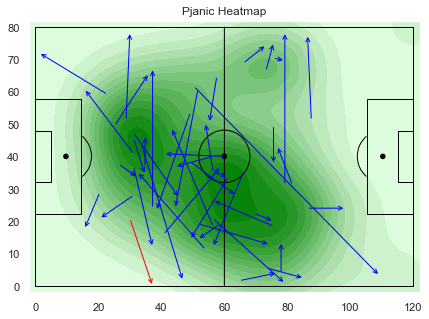

Sucessful pases are in blue and failed ones in red


In [196]:
#Pjanic heatmap

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
#ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.title("Pjanic Heatmap")
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('on')

for i in range(len(df_successful_passes_pjanic)):
    # annotate draw an arrow from a current position to pass_end_location
    ax.annotate("", xy = (df_successful_passes_pjanic.iloc[i]['x_end'], df_successful_passes_pjanic.iloc[i]['y_end']), xycoords = 'data',
               xytext = (df_successful_passes_pjanic.iloc[i]['x_start'], df_successful_passes_pjanic.iloc[i]['y_start']), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"),)
    
for i in range(len(df_failed_passes_pjanic)):
    # annotate draw an arrow from a current position to pass_end_location
    ax.annotate("", xy = (df_failed_passes_pjanic.iloc[i]['x_end'], df_failed_passes_pjanic.iloc[i]['y_end']), xycoords = 'data',
               xytext = (df_failed_passes_pjanic.iloc[i]['x_start'], df_failed_passes_pjanic.iloc[i]['y_start']), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"),)

x_coord = df_events_pjanic['x_start'].tolist()
y_coord = df_events_pjanic['y_start'].tolist()

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more blurry it looks
sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 15)
plt.show()

print("Sucessful pases are in blue and failed ones in red")

In [197]:
#Let's do the same thing for Jorginho

In [198]:
# we get starting and ending positions for all Jorginho passes using the powerful re library

y_start = []
x_start = []
y_end = []
x_end = []

for index,row in df_passes_jorginho.iterrows():
    int_list = [int(s) for s in re.findall(r'\b\d+\b', str(row['positions']))]
    y_start.append(0.8*int_list[0])
    x_start.append(1.2*int_list[1])
    y_end.append(0.8*int_list[2])
    x_end.append(1.2*int_list[3])
    
df_passes_jorginho['y_start'] = y_start
df_passes_jorginho['x_start'] = x_start
df_passes_jorginho['y_end'] = y_end
df_passes_jorginho['x_end'] = x_end

C:\Users\Nathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\Nathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\Nathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [199]:
# we get starting and ending positions for all Jorginho events using the powerful re library

y_start = []
x_start = []
y_end = []
x_end = []

for index,row in df_events_jorginho.iterrows():
    int_list = [int(s) for s in re.findall(r'\b\d+\b', str(row['positions']))]
    y_start.append(0.8*int_list[0])
    x_start.append(1.2*int_list[1])
    y_end.append(0.8*int_list[2])
    x_end.append(1.2*int_list[3])
    
df_events_jorginho['y_start'] = y_start
df_events_jorginho['x_start'] = x_start
df_events_jorginho['y_end'] = y_end
df_events_jorginho['x_end'] = x_end

In [200]:
df_successful_passes_jorginho = df_passes_jorginho[df_passes_jorginho['pass_status'] == 'successful']
df_failed_passes_jorginho = df_passes_jorginho[df_passes_jorginho['pass_status'] == 'failed']

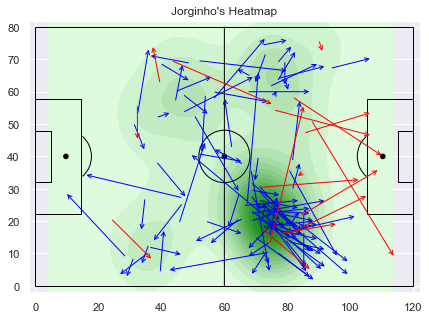

Sucessful passes are in blue and failed ones in red


In [201]:
#Jorginho heatmap

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
#ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.title("Jorginho's Heatmap")
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('on')

for i in range(len(df_successful_passes_jorginho)):
    # annotate draw an arrow from a current position to pass_end_location
    ax.annotate("", xy = (df_successful_passes_jorginho.iloc[i]['x_end'], df_successful_passes_jorginho.iloc[i]['y_end']), xycoords = 'data',
               xytext = (df_successful_passes_jorginho.iloc[i]['x_start'], df_successful_passes_jorginho.iloc[i]['y_start']), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"),)
    
for i in range(len(df_failed_passes_jorginho)):
    # annotate draw an arrow from a current position to pass_end_location
    ax.annotate("", xy = (df_failed_passes_jorginho.iloc[i]['x_end'], df_failed_passes_jorginho.iloc[i]['y_end']), xycoords = 'data',
               xytext = (df_failed_passes_jorginho.iloc[i]['x_start'], df_failed_passes_jorginho.iloc[i]['y_start']), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"),)

x_coord = df_events_jorginho['x_start'].tolist()
y_coord = df_events_jorginho['y_start'].tolist()

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more blurry it looks
sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 15)
plt.show()

print("Sucessful passes are in blue and failed ones in red")

## Theoretical question

In [202]:
def swapList(a, l, n):
    for i in range(1,1+n/2):
        tmp = a[l + i]
        a[l + i] = a[l + n/2 + i]
        a[l + n/2 + i] = tmp

In [203]:
def splitSwap(a, l, n):
    if n <= 1:
        return
    splitSwap(a, l, n/2)
    splitSwap(a, l+ n /2, n/2)
    swapList(a, l, n)

#### 1) How much running time does it take to execute splitSwap(a, 0, n)? (We want a Big O analysis.)

#### 2) What does this algorithm do? Is it optimal? Describe the mechanism of the algorithm in details, we do not want to know only its final result